# Suicide and World Happy Data

By: Emily Cao
SI 330

#### Uncomment to Download the ipyml and Restart Jupyter. (Only Have to Download It Once - Comment the Below Code After Restarting Jupyter)

In [1]:
# conda install -c conda-forge ipympl

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

Link to github repo of the datas: https://github.com/emilycao321/World-True-Happiest-Country

## Grabbing and Cleaning the Data
In this section, I grabbed the data for the number of suicide rate from https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate and how happy the country is with their world rank, happiness score, and other factors that contributes to the happiness score from https://www.kaggle.com/unsdsn/world-happiness. The Kaggle resource gave me the data from year 2015-2019 and the Wikipedia resources gave me from year 2000-2019 based on the table. I grabbed 2015 and 2019's population data from their specific Wikipedia resource. To clean up some data on the population column, I had to grab data from https://countryeconomy.com.

### "List of Countries by Suicide Rate" Wikipedia Resource
For the Wikipedia resources, I had to grab only the second row and onwards because the first row are only null values throughout. I also had to take out the asterisk from the the Country column because I will be merging the data from the two different resources on the Country.

In [3]:
suiciderate_scraped = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate', header=0)

In [4]:
suiciderate_country_scraped = suiciderate_scraped[0].iloc[1:, :]
suiciderate_country_scraped['Country'] = suiciderate_country_scraped['Country'].str.replace("*", "")
suiciderate_country_scraped.head()

/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/2625699462.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  suiciderate_country_scraped['Country'] = suiciderate_country_scraped['Country'].str.replace("*", "")
/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/2625699462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suiciderate_country_scraped['Country'] = suiciderate_country_scraped['Country'].str.replace("*", "")


,Country,All,Male,Female
1,Albania,3.7,5.3,2.2
2,Algeria,2.6,3.3,1.9
3,Angola,12.6,21.7,4.7
4,Antigua and Barbuda,0.3,0.0,0.6
5,Argentina,8.1,13.5,3.3


In [5]:
suiciderate_male_scraped = suiciderate_scraped[1].iloc[1:, :]
suiciderate_male_scraped['Country'] = suiciderate_male_scraped['Country'].str.replace("*", "")
suiciderate_male_scraped.head()

/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/1893503509.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  suiciderate_male_scraped['Country'] = suiciderate_male_scraped['Country'].str.replace("*", "")
/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/1893503509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suiciderate_male_scraped['Country'] = suiciderate_male_scraped['Country'].str.replace("*", "")


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Afghanistan,7.6,7.9,8.0,7.8,7.9,7.8,7.8,7.7,7.4,...,6.9,6.6,6.4,6.3,6.1,6.1,6.2,6.3,6.2,6.2
2,Albania,7.6,6.5,6.6,6.6,6.7,10.2,10.1,10.5,10.5,...,9.5,7.3,6.6,6.5,6.2,5.7,5.7,5.7,5.6,5.3
3,Algeria,5.9,5.7,5.6,5.2,5.0,4.8,4.6,4.4,4.2,...,3.8,3.7,3.7,3.6,3.5,3.4,3.3,3.2,3.2,3.3
4,Angola,30.0,29.8,29.0,29.1,28.6,27.1,28.4,25.2,25.5,...,23.9,22.8,24.1,24.3,22.6,22.7,21.8,21.0,21.3,21.7
5,Antigua and Barbuda,4.5,4.2,2.8,3.2,4.3,2.9,0.9,0.7,0.5,...,0.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
suiciderate_female_scraped = suiciderate_scraped[2].iloc[1:, :]
suiciderate_female_scraped['Country'] = suiciderate_female_scraped['Country'].str.replace("*", "")
# suiciderate_female_scraped['Country'] = suiciderate_female_scraped.Country.str.replace('North Macedonia','Macedonia')
suiciderate_female_scraped.head()

/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/2181307360.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  suiciderate_female_scraped['Country'] = suiciderate_female_scraped['Country'].str.replace("*", "")
/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/2181307360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suiciderate_female_scraped['Country'] = suiciderate_female_scraped['Country'].str.replace("*", "")


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Afghanistan,7.8,7.9,7.7,7.6,7.6,7.4,7.3,7.1,6.9,...,6.4,6.2,6.1,6.0,5.9,5.8,5.8,5.5,5.6,5.7
2,Albania,2.9,3.0,3.0,3.2,3.1,5.2,5.7,5.7,5.8,...,5.9,8.2,3.2,3.2,2.9,2.8,2.7,2.5,2.4,2.2
3,Algeria,3.5,3.4,3.3,3.1,2.9,2.8,2.7,2.5,2.4,...,2.2,2.1,2.1,2.1,2.0,2.0,1.9,1.9,1.9,1.9
4,Angola,6.2,6.1,6.5,6.9,6.8,6.5,6.8,5.9,6.1,...,5.6,5.2,5.4,5.2,4.8,5.1,5.1,4.9,4.6,4.7
5,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.8,0.8,0.9,0.0,0.6,0.6


In [7]:
suiciderate_all_scraped = suiciderate_scraped[3].iloc[1:, :]
suiciderate_all_scraped['Country'] = suiciderate_all_scraped['Country'].str.replace("*", "")
suiciderate_all_scraped.head()

/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/3842936027.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  suiciderate_all_scraped['Country'] = suiciderate_all_scraped['Country'].str.replace("*", "")
/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/3842936027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suiciderate_all_scraped['Country'] = suiciderate_all_scraped['Country'].str.replace("*", "")


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Afghanistan,7.7,7.9,7.9,7.7,7.8,7.6,7.6,7.4,7.2,...,6.7,6.4,6.2,6.2,6.0,6.0,6.0,6.0,5.9,6.0
2,Albania,5.2,4.7,4.8,4.9,4.9,7.7,7.8,8.1,8.1,...,7.6,7.6,4.8,4.8,4.5,4.2,4.2,4.1,3.9,3.7
3,Algeria,4.7,4.6,4.4,4.1,4.0,3.8,3.7,3.5,3.3,...,3.0,2.9,2.9,2.9,2.8,2.7,2.6,2.5,2.6,2.6
4,Angola,17.6,17.5,17.2,17.5,17.2,16.3,17.1,15.0,15.3,...,14.2,13.5,14.2,14.2,13.1,13.3,12.9,12.4,12.4,12.6
5,Antigua and Barbuda,2.0,1.9,1.3,1.4,2.0,1.3,0.4,0.3,0.2,...,0.1,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.3,0.3


### "World Happiness Report" Kaggle Resource
For the Kaggle resources, I had to rename the columns because of future visualizations and calculations that will have to be done with the specific columns. I had to rename some of the countries to fit the current name of the country as well as giving some countries a region since some of the countries didn't have a region column that will be used in the future calculations and visualizations. By grabbing some regions from a previous year data (2016) works to give the most of the other year datas without regions, but there were still some countries that didn't have a region because the country weren't in the 2016 data.

In [8]:
worldhappy_2015 = pd.read_csv('World Happiness Report Datasets/2015.csv')
worldhappy_2015 = worldhappy_2015.rename(columns={'Happiness Score':'Happiness Score 2015', 'Happiness Rank':'Happiness Rank 2015'})
worldhappy_2015.loc[worldhappy_2015['Country'].isin(['Congo (Kinshasa)']),'Country'] = 'DR Congo'
worldhappy_2015.loc[worldhappy_2015['Country'].isin(['Congo (Brazzaville)']),'Country'] = 'Congo'
worldhappy_2015.loc[worldhappy_2015['Country'].isin(['North Cyprus']),'Country'] = 'Northern Cyprus'
# In 2019, Macedonia renamed itself to North Macedonia
worldhappy_2015.loc[worldhappy_2015['Country'].isin(['Macedonia']),'Country'] = 'North Macedonia'

# In 2018, Swaziland renamed itself to Eswatini
worldhappy_2015.loc[worldhappy_2015['Country'].isin(['Swaziland']),'Country'] = 'Eswatini'
worldhappy_2015['Country'] = worldhappy_2015.Country.str.replace('Swaziland','Eswatini')
worldhappy_2015.head()

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
worldhappy_2016 = pd.read_csv('World Happiness Report Datasets/2016.csv')
worldhappy_2016 = worldhappy_2016.rename(columns={'Happiness Score':'Happiness Score 2016', 'Happiness Rank':'Happiness Rank 2016'})
worldhappy_2016.loc[worldhappy_2016['Country'].isin(['Congo (Kinshasa)']),'Country'] = 'DR Congo'
worldhappy_2016.loc[worldhappy_2016['Country'].isin(['Congo (Brazzaville)']),'Country'] = 'Congo'
worldhappy_2016.loc[worldhappy_2016['Country'].isin(['North Cyprus']),'Country'] = 'Northern Cyprus'

# In 2019, Macedonia renamed itself to North Macedonia
worldhappy_2016.loc[worldhappy_2016['Country'].isin(['Macedonia']),'Country'] = 'North Macedonia'

# In 2018, Swaziland renamed itself to Eswatini
worldhappy_2016.loc[worldhappy_2016['Country'].isin(['Swaziland']),'Country'] = 'Eswatini'
worldhappy_2016.head()

,Country,Region,Happiness Rank 2016,Happiness Score 2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [10]:
the_region = worldhappy_2016[["Country", "Region"]]
the_region.head()

,Country,Region
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe


In [11]:
worldhappy_2017 = pd.read_csv('World Happiness Report Datasets/2017.csv')
worldhappy_2017 = worldhappy_2017.rename(columns={'Country or region': 'Country', 'Happiness.Score':'Happiness Score 2017', 'Happiness.Rank':'Happiness Rank 2017'})
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['Congo (Kinshasa)']),'Country'] = 'DR Congo'
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['Congo (Brazzaville)']),'Country'] = 'Congo'
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['North Cyprus']),'Country'] = 'Northern Cyprus'
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['Taiwan Province of China']),'Country'] = 'Taiwan'
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['Hong Kong S.A.R., China']),'Country'] = 'Hong Kong'

# In 2019, Macedonia renamed itself to North Macedonia
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['Macedonia']),'Country'] = 'North Macedonia'

# In 2018, Swaziland renamed itself to Eswatini
worldhappy_2017.loc[worldhappy_2017['Country'].isin(['Swaziland']),'Country'] = 'Eswatini'

worldhappy_2017 = worldhappy_2017.merge(the_region, on='Country', how='left')

# World Happy 2016 doesn't have these three countries with its regions
worldhappy_2017.loc[worldhappy_2017['Country'] == 'Mozambique', 'Region']= 'Sub-Saharan Africa'
worldhappy_2017.loc[worldhappy_2017['Country'] == 'Lesotho', 'Region']= 'Sub-Saharan Africa'
worldhappy_2017.loc[worldhappy_2017['Country'] == 'Central African Republic', 'Region']= 'Sub-Saharan Africa'
worldhappy_2017.head()

,Country,Happiness Rank 2017,Happiness Score 2017,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


In [12]:
worldhappy_2018 = pd.read_csv('World Happiness Report Datasets/2018.csv')
worldhappy_2018 = worldhappy_2018.rename(columns={'Country or region': 'Country', 'Score':'Happiness Score 2018', 'Overall rank':'Happiness Rank 2018'})
worldhappy_2018.loc[worldhappy_2018['Country'].isin(['Trinidad & Tobago']),'Country'] = 'Trinidad and Tobago'
worldhappy_2018.loc[worldhappy_2018['Country'].isin(['Congo (Kinshasa)']),'Country'] = 'DR Congo'
worldhappy_2018.loc[worldhappy_2018['Country'].isin(['Congo (Brazzaville)']),'Country'] = 'Congo'

# In 2019, Macedonia renamed itself to North Macedonia
worldhappy_2018.loc[worldhappy_2018['Country'].isin(['Macedonia']),'Country'] = 'North Macedonia'

# In 2018, Swaziland renamed itself to Eswatini
worldhappy_2018.loc[worldhappy_2018['Country'].isin(['Swaziland']),'Country'] = 'Eswatini'

worldhappy_2018 = worldhappy_2018.merge(the_region, on='Country', how='left')

# World Happy 2016 doesn't have these three countries with its regions
worldhappy_2018.loc[worldhappy_2018['Country'] == 'Mozambique', 'Region']= 'Sub-Saharan Africa'
worldhappy_2018.loc[worldhappy_2018['Country'] == 'Lesotho', 'Region']= 'Sub-Saharan Africa'
worldhappy_2018.loc[worldhappy_2018['Country'] == 'Central African Republic', 'Region']= 'Sub-Saharan Africa'
worldhappy_2018.head()

,Happiness Rank 2018,Country,Happiness Score 2018,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe


In [13]:
worldhappy_2019 = pd.read_csv('World Happiness Report Datasets/2019.csv')
worldhappy_2019 = worldhappy_2019.rename(columns={'Country or region': 'Country', 'Score':'Happiness Score 2019', 'Overall rank':'Happiness Rank 2019'})
worldhappy_2019.loc[worldhappy_2019['Country'].isin(['Congo (Kinshasa)']),'Country'] = 'DR Congo'
worldhappy_2019.loc[worldhappy_2019['Country'].isin(['Congo (Brazzaville)']),'Country'] = 'Congo'
worldhappy_2019.loc[worldhappy_2019['Country'].isin(['Trinidad & Tobago']),'Country'] = 'Trinidad and Tobago'

# In 2018, Swaziland renamed itself to Eswatini
worldhappy_2019.loc[worldhappy_2019['Country'].isin(['Swaziland']),'Country'] = 'Eswatini'

worldhappy_2019 = worldhappy_2019.merge(the_region, on='Country', how='left')

# World Happy 2016 doesn't have these four countries with its regions
worldhappy_2019.loc[worldhappy_2019['Country'] == 'Mozambique', 'Region']= 'Sub-Saharan Africa'
worldhappy_2019.loc[worldhappy_2019['Country'] == 'Lesotho', 'Region']= 'Sub-Saharan Africa'
worldhappy_2019.loc[worldhappy_2019['Country'] == 'Central African Republic', 'Region']= 'Sub-Saharan Africa'
worldhappy_2019.loc[worldhappy_2019['Country'] == 'Eswatini', 'Region']= 'Sub-Saharan Africa'

# https://en.wikipedia.org/wiki/Sub-Saharan_Africa
# None of the other CSV show what region the country, Gambia, was part of, so I searched it up
worldhappy_2019.loc[worldhappy_2019['Country'] == 'Gambia', 'Region']= 'Sub-Saharan Africa'
worldhappy_2019.tail()

,Happiness Rank 2019,Country,Happiness Score 2019,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Sub-Saharan Africa


### Population for Each Country Resources
I wanted to make my calculations were correct for the years 2015 and 2019 on how happy the countries are. I couldn't find any data with lots of countries' populations for the years 2016-2018, so I only used the ones I could find. From the Wikipedia resources on 2015 and 2019's population, I had to give some missing countries from the "List of Countries By Suicide Rate," their population by searching the specific country's population for 2015 and 2019 from https://countryeconomy.com.

In [14]:
population_2015_scraped = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_in_2015',header=0)[1]
population_2015 = population_2015_scraped[["Country / territory", "Population2015(UN estimate)"]]
population_2015 = population_2015.rename(columns={'Country / territory': 'Country', 'Population2015(UN estimate)':'Population 2015'})
population_2015['Country'] = population_2015.Country.str.replace('Swaziland','Eswatini')
population_2015['Country'] = population_2015.Country.str.replace('Timor-Leste','East Timor')

# In 2019, Macedonia renamed itself to North Macedonia
population_2015['Country'] = population_2015.Country.str.replace('Macedonia','North Macedonia')

population_2015['Country'] =  [re.sub(r'\[(.*?)\]','', str(x)) for x in population_2015['Country']]
population_2015.head(10)

,Country,Population 2015
0,World,7379797139
1,China,1376048943
2,India,1311050527
3,United States,321418820
4,Indonesia,257563815
5,Brazil,207847528
6,Pakistan,188924874
7,Nigeria,182201962
8,Bangladesh,160995642
9,Russia,143456918


In [15]:
population_2019_scraped = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)',header=0)[0]
population_2019 = population_2019_scraped[["Country/Area", "Population(1 July 2019)"]]
population_2019 = population_2019.rename(columns={'Country/Area': 'Country', 'Population(1 July 2019)':'Population 2019'})
population_2019['Country'] = population_2019.Country.str.replace('Swaziland','Eswatini')
population_2019['Country'] = population_2019.Country.str.replace('Timor-Leste','East Timor')

# In 2019, Macedonia renamed itself to North Macedonia
population_2019['Country'] = population_2019.Country.str.replace('North North Macedonia','North Macedonia')

population_2019['Country'] =  [re.sub(r'\[(.*?)\]','', str(x)) for x in population_2019['Country']]
population_2019.head()

,Country,Population 2019
0,China,1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318


In [16]:
antigua_barbuda_scraped = pd.read_html('https://countryeconomy.com/demography/population/antigua-barbuda', header=0)[0]
antigua_barbuda_pop = antigua_barbuda_scraped.loc[antigua_barbuda_scraped['Date'].isin([2015, 2019])]
antigua_barbuda_pop

,Date,Density,Male,Female,Population
1,2019,221,46851,50264,97115
5,2015,213,45028,48543,93571


In [17]:
congo_scraped = pd.read_html('https://countryeconomy.com/demography/population/congo', header=0)[0]
congo_pop = congo_scraped.loc[congo_scraped['Date'].isin([2015, 2019])]
congo_pop

,Date,Density,Male,Female,Population
1,2019,13,2687358,2693146,4568000
5,2015,12,2422571,2433522,4138000


In [18]:
ivory_coast_scraped = pd.read_html('https://countryeconomy.com/demography/population/ivory-coast',header=0)[0]
ivory_coast_pop = ivory_coast_scraped.loc[ivory_coast_scraped['Date'].isin([2015,2019])]
ivory_coast_pop

,Date,Density,Male,Female,Population
1,2019,80,12974206,12742348,25716554
5,2015,74,11747319,11478829,23711000


In [19]:
dr_congo_scraped = pd.read_html('https://countryeconomy.com/demography/population/democratic-republic-congo',header=0)[0]
dr_congo_pop = dr_congo_scraped.loc[dr_congo_scraped['Date'].isin([2015,2019])]
dr_congo_pop

,Date,Density,Male,Female,Population
1,2019,37,43319103,43471465,87911000
5,2015,33,38019960,38224572,77267000


In [20]:
seychelles_scraped = pd.read_html('https://countryeconomy.com/demography/population/seychelles',header=0)[0]
seychelles_pop = seychelles_scraped.loc[seychelles_scraped['Date'].isin([2015,2019])]
seychelles_pop

,Date,Density,Male,Female,Population
1,2019,212,50107,47518,97625
5,2015,202,48073,45346,93000


In [21]:
# Only found in 2015 World Happiness Report CSV since I am only using population for 2015 and 2019
sudan_scraped = pd.read_html('https://countryeconomy.com/demography/population/sudan', header=0)[0]
sudan_pop = sudan_scraped.loc[sudan_scraped['Date'].isin([2015])]
sudan_pop

,Date,Density,Male,Female,Population
5,2015,21,19424627,19478321,38902948


In [22]:
# Only found in 2019 World Happiness Report CSV since I am only using population for 2015 and 2019
south_sudan_scraped = pd.read_html('https://countryeconomy.com/demography/population/south-sudan', header=0)[0]
south_sudan_pop = south_sudan_scraped.loc[south_sudan_scraped['Date'].isin([2019])]
south_sudan_pop

,Date,Density,Male,Female,Population
1,2019,17,5536530,5525584,11062114


## Merging the Two Different Resources
For future uses, a function was created to easily merge the two different resources on their country, but keeping the data mainly from the Kaggle resource.

In [23]:
def merge_year(year):
    suiciderate_female = suiciderate_female_scraped[['Country',year]]
    suiciderate_male = suiciderate_male_scraped[['Country',year]]
    suiciderate_all_sexes = suiciderate_all_scraped[['Country',year]]
    suiciderate_sexes = suiciderate_male.merge(suiciderate_female, on='Country', how='left').rename(columns={year+'_x': 'Male Suicide Rate ' + year, year+'_y': 'Female Suicide Rate ' + year})
    suiciderate_all = suiciderate_sexes.merge(suiciderate_all_sexes, on='Country', how='left').rename(columns={year: 'All '+ year})
    suiciderate_all.Country = suiciderate_all.Country.str.replace('\u202f', '')
    return suiciderate_all

## <mark>Problem 1</mark>: For 2015 and 2019, find the top ten happiest countries based on its suicide rate and happiness score?
In this finding, I had to find the 2015 and 2019's top 10 happiest countrie based on its suicide rate and happiness score. The Wikipedia resources wrote that the suicide rate was based on every 100,000 people, so I multipled the data by that number to make it accurate and easy to calculate. To find the calcuation to this question, the I had to divide the suicide rate with the population to give an accruate representation of how many people suicide with the country's population. Some countries have a low population and could possibly have a low number of suicide rate. Just using the low suicide rate that is only about the country's suicide number by 100,000 won't accurately represent the country' suicide rate of how many people suicide compared to the number of people in the country. Due to this, I had to adjust the data by multiplying the suicide rate by 100,000 after multiplying it by .01 since the number is a rate, which in percentage and needs to be changed into a number value. To answer the question, I add the happiness score to the adjusted suicide rate for all gender of each year and divide this by 2 sincing I'm using two different resources. I didn't have to divide it by 2 because without the division, I could find the top ten countries, but because of the two resources, I decided it might be a better choice to do so.

### Year 2015
Below I will be adjusting the data based on the year 2015.

In [24]:
suiciderate_all2015 = merge_year('2015')
suiciderate_all2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015
0,Afghanistan,6.1,5.8,6.0
1,Albania,5.7,2.8,4.2
2,Algeria,3.4,2.0,2.7
3,Angola,22.7,5.1,13.3
4,Antigua and Barbuda,0.0,0.8,0.4


In [25]:
pop_suic_merged2015 = suiciderate_all2015.merge(population_2015, on='Country', how='left')
pop_suic_merged2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015
0,Afghanistan,6.1,5.8,6.0,24485600
1,Albania,5.7,2.8,4.2,3195000
2,Algeria,3.4,2.0,2.7,35978000
3,Angola,22.7,5.1,13.3,18992708
4,Antigua and Barbuda,0.0,0.8,0.4,NaN


In [26]:
pop_suic_merged2015 = suiciderate_all2015.merge(population_2015, on='Country', how='left')
pop_suic_merged2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015
0,Afghanistan,6.1,5.8,6.0,24485600
1,Albania,5.7,2.8,4.2,3195000
2,Algeria,3.4,2.0,2.7,35978000
3,Angola,22.7,5.1,13.3,18992708
4,Antigua and Barbuda,0.0,0.8,0.4,NaN


### Find the null populations (Did this for all years)

In [27]:
nan_rows = pop_suic_merged2015[pop_suic_merged2015['Population 2015'].isnull()]
nan_rows

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015
4,Antigua and Barbuda,0.0,0.8,0.4,NaN
37,Congo,18.7,7.5,12.5,NaN
39,Ivory Coast,28.8,5.8,17.7,NaN
45,DR Congo,20.4,5.1,12.3,NaN
144,Seychelles,13.8,1.4,7.7,NaN
152,South Sudan,9.8,3.3,6.4,NaN


In [28]:
antigua_barbuda2015_pop = antigua_barbuda_pop[antigua_barbuda_pop['Date'] == 2015]['Population'].iloc[0]
antigua_barbuda2015_pop

93571

In [29]:
congo2015_pop = congo_pop[congo_pop['Date'] == 2015]['Population'].iloc[0]
congo2015_pop

4138000

In [30]:
ivory_coast2015_pop = ivory_coast_pop[ivory_coast_pop['Date'] == 2015]['Population'].iloc[0]
ivory_coast2015_pop

23711000

In [31]:
dr_congo2015_pop = dr_congo_pop[dr_congo_pop['Date'] == 2015]['Population'].iloc[0]
dr_congo2015_pop

77267000

In [32]:
seychelles2015_pop = seychelles_pop[seychelles_pop['Date'] == 2015]['Population'].iloc[0]
seychelles2015_pop

93000

In [33]:
pop_suic_merged2015.loc[pop_suic_merged2015['Country'] == 'Antigua and Barbuda', 'Population 2015']=antigua_barbuda2015_pop
pop_suic_merged2015.loc[pop_suic_merged2015['Country'] == 'Congo', 'Population 2015']=congo2015_pop
pop_suic_merged2015.loc[pop_suic_merged2015['Country'] == 'Ivory Coast', 'Population 2015']=ivory_coast2015_pop
pop_suic_merged2015.loc[pop_suic_merged2015['Country'] == 'DR Congo', 'Population 2015']=dr_congo2015_pop
pop_suic_merged2015.loc[pop_suic_merged2015['Country'] == 'Seychelles', 'Population 2015']=seychelles2015_pop

pop_suic_merged2015['Population 2015'] = pop_suic_merged2015['Population 2015'].astype(float)
pop_suic_merged2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015
0,Afghanistan,6.1,5.8,6.0,24485600.0
1,Albania,5.7,2.8,4.2,3195000.0
2,Algeria,3.4,2.0,2.7,35978000.0
3,Angola,22.7,5.1,13.3,18992708.0
4,Antigua and Barbuda,0.0,0.8,0.4,93571.0


In [34]:
suiciderate_merged2015 = pop_suic_merged2015.merge(worldhappy_2015, on='Country', how='right')
suiciderate_merged2015.drop([col for col in suiciderate_merged2015.columns if '_y' in col], axis=1, inplace=True)
suiciderate_merged2015.drop([col for col in suiciderate_merged2015.columns if '_x' in col], axis=1, inplace=True)
suiciderate_merged2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,15.2,6.0,10.5,7785806.0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,21.0,5.2,13.2,317630.0,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,11.3,4.9,8.1,5534738.0,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,13.9,7.1,10.6,4858199.0,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,16.4,6.0,11.2,34108752.0,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [35]:
pop_suic_copy2015 = suiciderate_merged2015.copy()
pop_suic_copy2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,15.2,6.0,10.5,7785806.0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,21.0,5.2,13.2,317630.0,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,11.3,4.9,8.1,5534738.0,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,13.9,7.1,10.6,4858199.0,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,16.4,6.0,11.2,34108752.0,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [36]:
pop_suic_copy2015['Male Suicide Rate 2015'] = ((pop_suic_copy2015['Male Suicide Rate 2015'] * .01) * 100000)
pop_suic_copy2015['Female Suicide Rate 2015'] = ((pop_suic_copy2015['Female Suicide Rate 2015'] * .01) * 100000)
pop_suic_copy2015['All 2015'] = ((pop_suic_copy2015['All 2015'] * .01) * 100000)
pop_suic_copy2015.head()

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,15200.0,6000.0,10500.0,7785806.0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,21000.0,5200.0,13200.0,317630.0,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,11300.0,4900.0,8100.0,5534738.0,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,13900.0,7100.0,10600.0,4858199.0,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,16400.0,6000.0,11200.0,34108752.0,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
pop_suic_copy2015['All + Happiness 2015'] = ((pop_suic_copy2015['All 2015']/pop_suic_copy2015['Population 2015']) + pop_suic_copy2015['Happiness Score 2015'])/2
ascending_suicide2015 = pop_suic_copy2015.sort_values(by=['All + Happiness 2015'], ascending=False)

# Some of the countries listed in the CSV is not in the Wikipedia website
ascending_suicide2015.tail(7)

,Country,Male Suicide Rate 2015,Female Suicide Rate 2015,All 2015,Population 2015,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,All + Happiness 2015
157,Togo,26700.0,7700.0,16700.0,6191155.0,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,1.420849
37,Taiwan,NaN,NaN,NaN,NaN,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323,NaN
65,Northern Cyprus,NaN,NaN,NaN,NaN,Western Europe,66,5.695,0.05635,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,1.59888,NaN
68,Kosovo,NaN,NaN,NaN,NaN,Central and Eastern Europe,69,5.589,0.05018,0.80148,0.81198,0.63132,0.24749,0.04741,0.28310,2.76579,NaN
71,Hong Kong,NaN,NaN,NaN,NaN,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,NaN
90,Somaliland region,NaN,NaN,NaN,NaN,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,NaN
107,Palestinian Territories,NaN,NaN,NaN,NaN,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384,NaN


### Year 2019
Below I will be adjusting the data based on the year 2019.

In [38]:
suiciderate_all2019 = merge_year('2019')
suiciderate_all2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019
0,Afghanistan,6.2,5.7,6.0
1,Albania,5.3,2.2,3.7
2,Algeria,3.3,1.9,2.6
3,Angola,21.7,4.7,12.6
4,Antigua and Barbuda,0.0,0.6,0.3


In [39]:
# suiciderate_all2019.Country = suiciderate_all2019.Country.str.replace('\u202f', '')
pop_suic_merged2019 = suiciderate_all2019.merge(population_2019, on='Country', how='left')
pop_suic_merged2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019
0,Afghanistan,6.2,5.7,6.0,38041754
1,Albania,5.3,2.2,3.7,2880917
2,Algeria,3.3,1.9,2.6,43053054
3,Angola,21.7,4.7,12.6,31825295
4,Antigua and Barbuda,0.0,0.6,0.3,97118


In [40]:
# pop_suic_copy2019 = pop_suic_merged2019.copy()
# pop_suic_copy2019.head()

In [41]:
antigua_barbuda2019_pop = antigua_barbuda_pop[antigua_barbuda_pop['Date'] == 2019]['Population'].iloc[0]
antigua_barbuda2019_pop

97115

In [42]:
congo2019_pop = congo_pop[congo_pop['Date'] == 2019]['Population'].iloc[0]
congo2019_pop

4568000

In [43]:
ivory_coast2019_pop = ivory_coast_pop[ivory_coast_pop['Date'] == 2019]['Population'].iloc[0]
ivory_coast2019_pop

25716554

In [44]:
dr_congo2019_pop = dr_congo_pop[dr_congo_pop['Date'] == 2019]['Population'].iloc[0]
dr_congo2019_pop

87911000

In [45]:
seychelles2019_pop = seychelles_pop[seychelles_pop['Date'] == 2019]['Population'].iloc[0]
seychelles2019_pop

97625

In [46]:
pop_suic_merged2019.loc[pop_suic_merged2019['Country'] == 'Antigua and Barbuda', 'Population 2019']=antigua_barbuda2019_pop
pop_suic_merged2019.loc[pop_suic_merged2019['Country'] == 'Congo', 'Population 2019']=congo2019_pop
pop_suic_merged2019.loc[pop_suic_merged2019['Country'] == 'Ivory Coast', 'Population 2019']=ivory_coast2019_pop
pop_suic_merged2019.loc[pop_suic_merged2019['Country'] == 'DR Congo', 'Population 2019']=dr_congo2019_pop
pop_suic_merged2019.loc[pop_suic_merged2019['Country'] == 'Seychelles', 'Population 2019']=seychelles2019_pop

pop_suic_merged2019['Population 2019'] = pop_suic_merged2019['Population 2019'].astype(float)
pop_suic_merged2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019
0,Afghanistan,6.2,5.7,6.0,38041754.0
1,Albania,5.3,2.2,3.7,2880917.0
2,Algeria,3.3,1.9,2.6,43053054.0
3,Angola,21.7,4.7,12.6,31825295.0
4,Antigua and Barbuda,0.0,0.6,0.3,97115.0


In [47]:
# Make sure there are no missing population (I did this for each year, but only showing for 2019)
nan_rows3 = pop_suic_merged2019[pop_suic_merged2019['Population 2019'].isnull()]
nan_rows3

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019


In [48]:
suiciderate_merged2019 = pop_suic_merged2019.merge(worldhappy_2019, on='Country', how='right')
suiciderate_merged2019.drop([col for col in suiciderate_merged2019.columns if '_y' in col], axis=1, inplace=True)
suiciderate_merged2019.drop([col for col in suiciderate_merged2019.columns if '_x' in col], axis=1, inplace=True)
suiciderate_merged2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019,Happiness Rank 2019,Happiness Score 2019,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Finland,20.1,6.8,13.4,5532156.0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,Denmark,11.1,4.2,7.6,5771876.0,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,Norway,13.4,6.3,9.9,5378857.0,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,Iceland,18.7,3.5,11.2,339031.0,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,Netherlands,12.5,6.1,9.3,17097130.0,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [49]:
pop_suic_copy2019 = suiciderate_merged2019.copy()
pop_suic_copy2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019,Happiness Rank 2019,Happiness Score 2019,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Finland,20.1,6.8,13.4,5532156.0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,Denmark,11.1,4.2,7.6,5771876.0,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,Norway,13.4,6.3,9.9,5378857.0,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,Iceland,18.7,3.5,11.2,339031.0,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,Netherlands,12.5,6.1,9.3,17097130.0,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [50]:
pop_suic_copy2019['Male Suicide Rate 2019'] = ((pop_suic_copy2019['Male Suicide Rate 2019'] * .01) * 100000)
pop_suic_copy2019['Female Suicide Rate 2019'] = ((pop_suic_copy2019['Female Suicide Rate 2019'] * .01) * 100000)
pop_suic_copy2019['All 2019'] = ((pop_suic_copy2019['All 2019'] * .01) * 100000)

pop_suic_copy2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019,Happiness Rank 2019,Happiness Score 2019,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Finland,20100.0,6800.0,13400.0,5532156.0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,Denmark,11100.0,4200.0,7600.0,5771876.0,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,Norway,13400.0,6300.0,9900.0,5378857.0,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,Iceland,18700.0,3500.0,11200.0,339031.0,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,Netherlands,12500.0,6100.0,9300.0,17097130.0,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [51]:
pop_suic_copy2019['All + Happiness 2019'] = ((pop_suic_copy2019['All 2019']/pop_suic_copy2019['Population 2019']) + pop_suic_copy2019['Happiness Score 2019'])/2
ascending_suicide2019 = pop_suic_copy2019.sort_values(by=['All + Happiness 2019'], ascending=False)

# Some of the countries listed in the CSV is not in the Wikipedia website and vice versa
ascending_suicide2019.tail(6)

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,All 2019,Population 2019,Happiness Rank 2019,Happiness Score 2019,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region,All + Happiness 2019
155,South Sudan,10400.0,3400.0,6700.0,11062113.0,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Sub-Saharan Africa,1.426803
24,Taiwan,NaN,NaN,NaN,NaN,25,6.446,1.368,1.430,0.914,0.351,0.242,0.097,Eastern Asia,NaN
45,Kosovo,NaN,NaN,NaN,NaN,46,6.100,0.882,1.232,0.758,0.489,0.262,0.006,Central and Eastern Europe,NaN
63,Northern Cyprus,NaN,NaN,NaN,NaN,64,5.718,1.263,1.252,1.042,0.417,0.191,0.162,Western Europe,NaN
75,Hong Kong,NaN,NaN,NaN,NaN,76,5.430,1.438,1.277,1.122,0.440,0.258,0.287,Eastern Asia,NaN
109,Palestinian Territories,NaN,NaN,NaN,NaN,110,4.696,0.657,1.247,0.672,0.225,0.103,0.066,Middle East and Northern Africa,NaN


In [52]:
top10_all_happ_2015 = ascending_suicide2015.head(10)
top10_2015 = top10_all_happ_2015[["Country", 'All + Happiness 2015']]
top10_2015

,Country,All + Happiness 2015
1,Iceland,3.801279
0,Switzerland,3.794174
2,Denmark,3.764232
3,Norway,3.762091
4,Canada,3.713664
5,Finland,3.704131
6,Netherlands,3.689281
7,Sweden,3.682696
8,New Zealand,3.644271
9,Australia,3.642265


In [53]:
top10_all_happ_2019 = ascending_suicide2019.head(10)
top10_2019 = top10_all_happ_2019[["Country", 'All + Happiness 2019']]
top10_2019 

,Country,All + Happiness 2019
0,Finland,3.885711
1,Denmark,3.800658
2,Norway,3.777920
3,Iceland,3.763518
4,Netherlands,3.744272
5,Switzerland,3.740570
6,Sweden,3.672118
7,New Zealand,3.654577
8,Canada,3.639138
9,Austria,3.623581


## <mark>Problem 2</mark>: Find the Ratio of Combination of Suicide Rate for Each Region and Number of Countries From the Region For Each Year
I wanted to see the comparision of all the suicide rate of a region to the number of countries of the region of each year to see how each region compares to each other in terms of how many people suicide based on the cumulative suicide rate of the region. One thing to keep in mind is that some regions have less countries compared to others, so the number of regions might not exactly be as accurate of a comparision, but even in the real world, we differentiate the regions similar to how the Kaggle resources do it.

In [54]:
suic_region2015 = suiciderate_merged2015[['Country', 'All 2015', 'Region']]
suic_region2015.head()

,Country,All 2015,Region
0,Switzerland,10.5,Western Europe
1,Iceland,13.2,Western Europe
2,Denmark,8.1,Western Europe
3,Norway,10.6,Western Europe
4,Canada,11.2,North America


In [55]:
suiciderate_all2016 = merge_year('2016')
suiciderate_merged2016 = suiciderate_all2016.merge(worldhappy_2016, on='Country', how='right')
suic_region2016 = suiciderate_merged2016[['Country', 'All 2016', 'Region']]
suic_region2016.head()

,Country,All 2016,Region
0,Denmark,8.2,Western Europe
1,Switzerland,9.8,Western Europe
2,Iceland,12.3,Western Europe
3,Norway,11.1,Western Europe
4,Finland,13.3,Western Europe


In [56]:
suiciderate_all2017 = merge_year('2017')
suiciderate_merged2017 = suiciderate_all2017.merge(worldhappy_2017, on='Country', how='right')
suic_region2017 = suiciderate_merged2017[['Country', 'All 2017', 'Region']]
suic_region2017.head()

,Country,All 2017,Region
0,Norway,10.4,Western Europe
1,Denmark,8.3,Western Europe
2,Iceland,11.7,Western Europe
3,Switzerland,10.4,Western Europe
4,Finland,14.4,Western Europe


In [57]:
suiciderate_all2018 = merge_year('2018')
suiciderate_merged2018 = suiciderate_all2018.merge(worldhappy_2018, on='Country', how='right')
suic_region2018 = suiciderate_merged2018[['Country', 'All 2018', 'Region']]
suic_region2018.head()

,Country,All 2018,Region
0,Finland,14.4,Western Europe
1,Norway,10.1,Western Europe
2,Denmark,8.2,Western Europe
3,Iceland,10.1,Western Europe
4,Switzerland,9.9,Western Europe


In [58]:
suic_region2019 = suiciderate_merged2019[['Country', 'All 2019', 'Region']]
suic_region2019.head()

,Country,All 2019,Region
0,Finland,13.4,Western Europe
1,Denmark,7.6,Western Europe
2,Norway,9.9,Western Europe
3,Iceland,11.2,Western Europe
4,Netherlands,9.3,Western Europe


### Sum of the Suicide Rate for Each Region
Since there's no specific data on the cumulative number of the suicide rate for each region, I had to find it for each region and for each year. To prevent having to do it repeatingly, a function was made to help getting the sum for each region based on the year given. This was made into a dictionary and then was converted into a dataframe, so it can be used for the future merge and caluculations.

In [59]:
def region_suic_sum(df, the_year, region_list):
    year = str(the_year)
    the_regions_dict = {}
    the_regions_dict['All Suicide Rate ' + year] = {}
    for x in range(len(region_list)):
        singular_region = region_list[x]
        new_sum = df.loc[df['Region'] == singular_region, 'All ' + year].sum()
        the_regions_dict['All Suicide Rate ' + year][singular_region] = new_sum

    return the_regions_dict

In [60]:
region_list = suic_region2019.Region.unique().tolist()
region_list

['Western Europe',
 'Australia and New Zealand',
 'North America',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Southeastern Asia',
 'Sub-Saharan Africa',
 'Southern Asia']

In [61]:
# https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
the_region2015 = pd.DataFrame.from_dict(region_suic_sum(suic_region2015, 2015, region_list)).reset_index()
the_region2016 = pd.DataFrame.from_dict(region_suic_sum(suic_region2016, 2016, region_list)).reset_index()
the_region2017 = pd.DataFrame.from_dict(region_suic_sum(suic_region2017, 2017, region_list)).reset_index()
the_region2018 = pd.DataFrame.from_dict(region_suic_sum(suic_region2018, 2018, region_list)).reset_index()
the_region2019 = pd.DataFrame.from_dict(region_suic_sum(suic_region2019, 2019, region_list)).reset_index()
the_region2019

,index,All Suicide Rate 2019
0,Australia and New Zealand,21.6
1,Central and Eastern Europe,298.8
2,Eastern Asia,58.1
3,Latin America and Caribbean,132.8
4,Middle East and Northern Africa,77.5
5,North America,24.8
6,Southeastern Asia,50.3
7,Southern Asia,60.4
8,Sub-Saharan Africa,605.0
9,Western Europe,169.2


In [62]:
merged1 = the_region2015.merge(the_region2016, on='index', how='left')
merged2 = merged1.merge(the_region2017, on='index', how='left')
merged3 = merged2.merge(the_region2018, on='index', how='left')
merged4 = merged3.merge(the_region2019, on='index', how='left')
merged4.drop([col for col in merged4.columns if '_y' in col], axis=1, inplace=True)
merged4.drop([col for col in merged4.columns if '_x' in col], axis=1, inplace=True)
merged4.rename(columns = {'index':'Region'}, inplace = True)
# merged4.set_index('Region', inplace = True)
merged4

,Region,All Suicide Rate 2015,All Suicide Rate 2016,All Suicide Rate 2017,All Suicide Rate 2018,All Suicide Rate 2019
0,Australia and New Zealand,22.9,22.4,23.9,22.0,21.6
1,Central and Eastern Europe,350.1,334.4,313.4,305.1,298.8
2,Eastern Asia,62.9,61.0,58.8,60.2,58.1
3,Latin America and Caribbean,164.5,170.5,144.6,142.2,132.8
4,Middle East and Northern Africa,83.9,78.3,78.1,78.5,77.5
5,North America,24.1,24.1,26.1,24.6,24.8
6,Southeastern Asia,48.2,48.5,41.8,48.7,50.3
7,Southern Asia,62.2,61.2,60.6,60.4,60.4
8,Sub-Saharan Africa,663.9,463.8,592.6,576.5,605.0
9,Western Europe,182.5,176.4,175.8,172.7,169.2


### Count the Number of Countries That Located In Its Respective Region For Each Year
To solve the problem of how each region compares to each other for eahc year on their suicide rate, I have to find the total count of countries for each region. Since some years have less or more countries in their region, each year's number of countries for each region has to be counted. This is later merged together in which the dataframe shows the count of countries each year for each region.

In [63]:
suic_region2015_count = pd.DataFrame(suic_region2015.Region.value_counts()).reset_index()
suic_region2015_count.rename(columns={'index': 'Region','Region':'Count 2015'}, inplace = True)
suic_region2016_count = pd.DataFrame(suic_region2016.Region.value_counts()).reset_index()
suic_region2016_count.rename(columns = {'index': 'Region','Region':'Count 2016'}, inplace = True)
suic_region2017_count = pd.DataFrame(suic_region2017.Region.value_counts()).reset_index()
suic_region2017_count.rename(columns = {'index': 'Region','Region':'Count 2017'}, inplace = True)
suic_region2018_count = pd.DataFrame(suic_region2018.Region.value_counts()).reset_index()
suic_region2018_count.rename(columns = {'index': 'Region','Region':'Count 2018'}, inplace = True)
suic_region2019_count = pd.DataFrame(suic_region2019.Region.value_counts()).reset_index()
suic_region2019_count.rename(columns = {'index': 'Region','Region':'Count 2019'}, inplace = True)
suic_region2015_count

,Region,Count 2015
0,Sub-Saharan Africa,40
1,Central and Eastern Europe,29
2,Latin America and Caribbean,22
3,Western Europe,21
4,Middle East and Northern Africa,20
5,Southeastern Asia,9
6,Southern Asia,7
7,Eastern Asia,6
8,North America,2
9,Australia and New Zealand,2


In [64]:
suicregion_count_merge1 = suic_region2015_count.merge(suic_region2016_count, on='Region', how='outer')
suicregion_count_merge2 = suicregion_count_merge1.merge(suic_region2017_count, on='Region', how='outer')
suicregion_count_merge3 = suicregion_count_merge2.merge(suic_region2018_count, on='Region', how='outer')
suicregion_count_merge4 = suicregion_count_merge3.merge(suic_region2019_count, on='Region', how='outer')
suicregion_count_merge4.drop([col for col in merged4.columns if '_y' in col], axis=1, inplace=True)
suicregion_count_merge4.drop([col for col in merged4.columns if '_x' in col], axis=1, inplace=True)
suicregion_count_merge4

,Region,Count 2015,Count 2016,Count 2017,Count 2018,Count 2019
0,Sub-Saharan Africa,40,38,39,39,40
1,Central and Eastern Europe,29,29,29,29,29
2,Latin America and Caribbean,22,24,22,22,21
3,Western Europe,21,21,21,21,21
4,Middle East and Northern Africa,20,19,19,19,19
5,Southeastern Asia,9,9,8,9,9
6,Southern Asia,7,7,7,7,7
7,Eastern Asia,6,6,6,6,6
8,North America,2,2,2,2,2
9,Australia and New Zealand,2,2,2,2,2


### Calculate the Suicide Rate with the Region Count for Each Year
To calculate for each year without having to repeatedly do it, I created a function that will do this by just adding the year.

In [65]:
def suic_region_count(year):
    year = str(year)
    merged_items = merged4[['Region','All Suicide Rate ' + year,]].merge(suicregion_count_merge4[['Count ' + year,'Region']], on = 'Region',how = 'left')
    merged_items['Suicide Rate/ Region Count ' + year] = (merged_items['All Suicide Rate ' + year] / merged_items['Count ' + year])
    return merged_items

In [66]:
suic_region_count2015 = suic_region_count(2015)
suic_region_count2016 = suic_region_count(2016)
suic_region_count2017 = suic_region_count(2017)
suic_region_count2018 = suic_region_count(2018)
suic_region_count2019 = suic_region_count(2019)
suic_region_count2019

,Region,All Suicide Rate 2019,Count 2019,Suicide Rate/ Region Count 2019
0,Australia and New Zealand,21.6,2,10.800000
1,Central and Eastern Europe,298.8,29,10.303448
2,Eastern Asia,58.1,6,9.683333
3,Latin America and Caribbean,132.8,21,6.323810
4,Middle East and Northern Africa,77.5,19,4.078947
5,North America,24.8,2,12.400000
6,Southeastern Asia,50.3,9,5.588889
7,Southern Asia,60.4,7,8.628571
8,Sub-Saharan Africa,605.0,40,15.125000
9,Western Europe,169.2,21,8.057143


### Merging the Suicide Rate/ Region Count [Year] for Each Region
Condensing all the Suicide Rate/ Region Count for each year for all the regions to help with visualizations.

In [67]:
suicregion_all_merge1 = suic_region_count2015[['Region', 'Suicide Rate/ Region Count 2015']].merge(suic_region_count2016[['Region', 'Suicide Rate/ Region Count 2016']], on='Region', how='outer')
suicregion_all_merge2 = suicregion_all_merge1.merge(suic_region_count2017[['Region', 'Suicide Rate/ Region Count 2017']], on='Region', how='outer')
suicregion_all_merge3 = suicregion_all_merge2.merge(suic_region_count2018[['Region', 'Suicide Rate/ Region Count 2018']], on='Region', how='outer')
suicregion_all_merge4 = suicregion_all_merge3.merge(suic_region_count2019[['Region', 'Suicide Rate/ Region Count 2019']], on='Region', how='outer')
suicregion_all_merge4

,Region,Suicide Rate/ Region Count 2015,Suicide Rate/ Region Count 2016,Suicide Rate/ Region Count 2017,Suicide Rate/ Region Count 2018,Suicide Rate/ Region Count 2019
0,Australia and New Zealand,11.450000,11.200000,11.950000,11.000000,10.800000
1,Central and Eastern Europe,12.072414,11.531034,10.806897,10.520690,10.303448
2,Eastern Asia,10.483333,10.166667,9.800000,10.033333,9.683333
3,Latin America and Caribbean,7.477273,7.104167,6.572727,6.463636,6.323810
4,Middle East and Northern Africa,4.195000,4.121053,4.110526,4.131579,4.078947
5,North America,12.050000,12.050000,13.050000,12.300000,12.400000
6,Southeastern Asia,5.355556,5.388889,5.225000,5.411111,5.588889
7,Southern Asia,8.885714,8.742857,8.657143,8.628571,8.628571
8,Sub-Saharan Africa,16.597500,12.205263,15.194872,14.782051,15.125000
9,Western Europe,8.690476,8.400000,8.371429,8.223810,8.057143


## <mark>Problem 3</mark>: Find Each Regions'Average Happiness Rank for Each Year
Each country has a happiness rank and I wanted to find the region's average happiness rank for each year to help visualize each region compare to each other in terms of its ranking. This will be later used in the future visulization to compare the USA's happiness rank to all the regions' average happiness rank for each year. 

### Grab Only the Country, Happiness Rank, and Region For Each Year

In [68]:
suic_region_happy2015 = suiciderate_merged2015[['Country', 'Happiness Rank 2015', 'Region']]
suic_region_happy2016 = suiciderate_merged2016[['Country', 'Happiness Rank 2016', 'Region']]
suic_region_happy2017 = suiciderate_merged2017[['Country', 'Happiness Rank 2017', 'Region']]
suic_region_happy2018 = suiciderate_merged2018[['Country', 'Happiness Rank 2018', 'Region']]
suic_region_happy2019 = suiciderate_merged2019[['Country', 'Happiness Rank 2019', 'Region']]
suic_region_happy2019.head()

,Country,Happiness Rank 2019,Region
0,Finland,1,Western Europe
1,Denmark,2,Western Europe
2,Norway,3,Western Europe
3,Iceland,4,Western Europe
4,Netherlands,5,Western Europe


### Average Rank for Each Region
To avoid having to repeatedly code on retreiving the average rank for each year and each region, a function was created to help seamlessly do that with only needing the dataframe of Country, Happiness Rank, and Region for each year and the year for the particular dataframe.

In [69]:
def region_happy_sum(a_df, year):
    the_regions_happy_dict = {}
    the_regions_happy_dict['Happiness Rank ' + year] = {}
    for x in range(len(region_list)):
        single_region = region_list[x]
        new_happy_sum = a_df.loc[a_df['Region'] == single_region, 'Happiness Rank ' + year].sum()
        the_regions_happy_dict['Happiness Rank ' + year][single_region] = new_happy_sum

    return the_regions_happy_dict

In [70]:
the_region_happy2015 = pd.DataFrame.from_dict(region_happy_sum(suic_region_happy2015, '2015')).reset_index()
the_region_happy2016 = pd.DataFrame.from_dict(region_happy_sum(suic_region_happy2016, '2016')).reset_index()
the_region_happy2017 = pd.DataFrame.from_dict(region_happy_sum(suic_region_happy2017, '2017')).reset_index()
the_region_happy2018 = pd.DataFrame.from_dict(region_happy_sum(suic_region_happy2018, '2018')).reset_index()
the_region_happy2019 = pd.DataFrame.from_dict(region_happy_sum(suic_region_happy2019, '2019')).reset_index()
the_region_happy2015

,index,Happiness Rank 2015
0,Australia and New Zealand,19
1,Central and Eastern Europe,2291
2,Eastern Asia,387
3,Latin America and Caribbean,1032
4,Middle East and Northern Africa,1552
5,North America,20
6,Southeastern Asia,731
7,Southern Asia,792
8,Sub-Saharan Africa,5116
9,Western Europe,620


### Merge the Data Frames 

In [71]:
merged_happy1 = the_region_happy2015.merge(the_region_happy2016, on='index', how='outer')
merged_happy2 = merged_happy1.merge(the_region_happy2017, on='index', how='outer')
merged_happy3 = merged_happy2.merge(the_region_happy2018, on='index', how='outer')
merged_happy4 = merged_happy3.merge(the_region_happy2019, on='index', how='outer')
merged_happy4.rename(columns = {'index':'Region'}, inplace = True)
# merged4.set_index('Region', inplace = True)
merged_happy4

,Region,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Rank 2018,Happiness Rank 2019
0,Australia and New Zealand,19,17,18,18,19
1,Central and Eastern Europe,2291,2275,2177,2174,2058
2,Eastern Asia,387,403,389,393,389
3,Latin America and Caribbean,1032,1160,1117,1112,1079
4,Middle East and Northern Africa,1552,1484,1452,1537,1613
5,North America,20,19,21,25,28
6,Southeastern Asia,731,720,590,737,766
7,Southern Asia,792,782,769,782,811
8,Sub-Saharan Africa,5116,4927,4987,4950,4992
9,Western Europe,620,613,570,518,491


In [72]:
merged_happy_new = merged_happy4.merge(suicregion_count_merge4, on="Region", how="left")
merged_happy_new

,Region,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Rank 2018,Happiness Rank 2019,Count 2015,Count 2016,Count 2017,Count 2018,Count 2019
0,Australia and New Zealand,19,17,18,18,19,2,2,2,2,2
1,Central and Eastern Europe,2291,2275,2177,2174,2058,29,29,29,29,29
2,Eastern Asia,387,403,389,393,389,6,6,6,6,6
3,Latin America and Caribbean,1032,1160,1117,1112,1079,22,24,22,22,21
4,Middle East and Northern Africa,1552,1484,1452,1537,1613,20,19,19,19,19
5,North America,20,19,21,25,28,2,2,2,2,2
6,Southeastern Asia,731,720,590,737,766,9,9,8,9,9
7,Southern Asia,792,782,769,782,811,7,7,7,7,7
8,Sub-Saharan Africa,5116,4927,4987,4950,4992,40,38,39,39,40
9,Western Europe,620,613,570,518,491,21,21,21,21,21


### Calculate the Average Happiness Rank with the Number of Countries and Its Happiness Rank
A function was created to avoid having to duplicate similar to codes for each year.

In [73]:
def happiness_over_regions_func(merged_happy_df):
    for x in range(2015, 2019+1):
        loop_year = str(x)
        merged_happy_df['Average Happiness Rank ' + loop_year] = merged_happy_df['Happiness Rank ' + loop_year]/merged_happy_df['Count ' + loop_year]
        merged_happy_df = merged_happy_df.rename(columns={'Average Happiness Rank ' + loop_year : loop_year})
    average_merged_happy_df = pd.DataFrame(merged_happy_df.iloc[:, [0, 11, 12, 13, 14, 15]])
    average_merged_happy_df[loop_year].apply(int)
    return average_merged_happy_df

In [74]:
happiness_over_regions = happiness_over_regions_func(merged_happy_new)
happiness_over_regions

,Region,2015,2016,2017,2018,2019
0,Australia and New Zealand,9.500000,8.500000,9.000000,9.000000,9.500000
1,Central and Eastern Europe,79.000000,78.448276,75.068966,74.965517,70.965517
2,Eastern Asia,64.500000,67.166667,64.833333,65.500000,64.833333
3,Latin America and Caribbean,46.909091,48.333333,50.772727,50.545455,51.380952
4,Middle East and Northern Africa,77.600000,78.105263,76.421053,80.894737,84.894737
5,North America,10.000000,9.500000,10.500000,12.500000,14.000000
6,Southeastern Asia,81.222222,80.000000,73.750000,81.888889,85.111111
7,Southern Asia,113.142857,111.714286,109.857143,111.714286,115.857143
8,Sub-Saharan Africa,127.900000,129.657895,127.871795,126.923077,124.800000
9,Western Europe,29.523810,29.190476,27.142857,24.666667,23.380952


## <mark>Problem 4</mark>: Find Each Year's Lowest and Highest Ranked's Happiness Rank and Compare It To Each Other and Its Respective Region
Here, I find the lowest and highest ranked country for each year and compare it to each other in one graph that will be shown later. Two other graphs are created to compare the lowest ranked countries for each year to its region and the highest ranked countries for each year to its region.

### Merge the Data With Each Country's Happiness Rank for Each Year

In [75]:
merged_low_happy1 = suiciderate_merged2015[['Country', 'Happiness Rank 2015']].merge(suiciderate_merged2016[['Country', 'Happiness Rank 2016']], on='Country', how='outer')
merged_low_happy2 = merged_low_happy1.merge(suiciderate_merged2017[['Country', 'Happiness Rank 2017']], on='Country', how='outer')
merged_low_happy3 = merged_low_happy2.merge(suiciderate_merged2018[['Country', 'Happiness Rank 2018']], on='Country', how='outer')
merged_low_happy4 = merged_low_happy3.merge(suiciderate_merged2019[['Country', 'Happiness Rank 2019']], on='Country', how='outer')
merged_low_happy4.tail()

,Country,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Happiness Rank 2018,Happiness Rank 2019
160,Somalia,NaN,76.0,93.0,98.0,112.0
161,Somaliland Region,NaN,97.0,NaN,NaN,NaN
162,Namibia,NaN,113.0,111.0,119.0,113.0
163,South Sudan,NaN,143.0,147.0,154.0,156.0
164,Gambia,NaN,NaN,NaN,NaN,120.0


### Grab Only the Region's Average Happiness Rank and the Specific Country's Happiness Rank for Each Year
To acheive this, a function was made to avoid having to duplicate the same codes. Since grabbing the specific country and region's rank is very specific, the first chunk before the for loop is used to grab only the happiness rank for each country and the region for each year. Suprisingly, the highest and lowest ranked country from each year were all from the same regions, so there was only one region when combing the datas together for each the lowest and highest rank. After the for loop, the calculation on the average happiness rank on all the countries in each region was made, which became the last five columns. The new dataframe became only the specific country of the year based on the "num", which 1 is the highest ranked and -1 is for the lowest ranked country.  

In [76]:
def low_high_happy_rank(suiciderate_merged_df, merged_happy4_df, merged_low_happy4_df, suicregion_count, year, num):
    country_year = suiciderate_merged_df['Country'].astype(str).iloc[num]
    region_year = suiciderate_merged_df['Region'].astype(str).iloc[num]
    region_rank_df = merged_happy4_df[merged_happy4_df['Region'] == region_year]
    region_rank_df = region_rank_df.rename(columns={'Region':'Country/Region'})
    country_rank_df = merged_low_happy4_df[merged_low_happy4_df['Country'] == country_year]
    country_rank_df = country_rank_df.rename(columns={'Country':'Country/Region'})
    country_count = suicregion_count[suicregion_count['Region'] == region_year]
    country_count_rank_df = country_count.rename(columns={'Region':'Country/Region'})
    region_rank_df = region_rank_df.append(country_rank_df, ignore_index = True)
    all_rank_df = region_rank_df.merge(country_count_rank_df, on="Country/Region", how="outer")
    for x in range(2015, 2019+1):
        loop_year = str(x)
        all_rank_df['Divided ' + loop_year] = all_rank_df['Happiness Rank ' + loop_year]/all_rank_df['Count ' + loop_year]
        all_rank_df = all_rank_df.rename(columns={'Divided ' + loop_year :'Happiness Rank OR Average Rank ' + loop_year})
        all_rank_df = all_rank_df.rename(columns={'Happiness Rank ' + loop_year :'Happiness Rank OR Average Rank ' + loop_year})
    all_rank_df = all_rank_df.set_index('Country/Region')
    divide_rank_df = pd.DataFrame(all_rank_df.iloc[0, 10:16])
    specific_country_rank_df = pd.DataFrame(all_rank_df.iloc[1, 0:5])
    entire_df = divide_rank_df.merge(specific_country_rank_df, how="outer", left_index=True, right_index=True)
    the_country = str(entire_df.columns[1])
    year = str(year)
    entire_df = entire_df.rename(columns={the_country :the_country + " " + year})
    
    return entire_df

In [77]:
low_rank_region_country2015 = low_high_happy_rank(suiciderate_merged2015, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2015, -1)
low_rank_region_country2015

,Sub-Saharan Africa,Togo 2015
Happiness Rank OR Average Rank 2015,127.900000,158.0
Happiness Rank OR Average Rank 2016,129.657895,155.0
Happiness Rank OR Average Rank 2017,127.871795,150.0
Happiness Rank OR Average Rank 2018,126.923077,139.0
Happiness Rank OR Average Rank 2019,124.800000,139.0


### Lowest Ranked

In [78]:
low_rank_region_country2015 = low_high_happy_rank(suiciderate_merged2015, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2015, -1)
low_rank_region_country2016 = low_high_happy_rank(suiciderate_merged2016, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2016, -1)
low_rank_region_country2017 = low_high_happy_rank(suiciderate_merged2017, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2017, -1)
low_rank_region_country2018 = low_high_happy_rank(suiciderate_merged2018, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2018, -1)
low_rank_region_country2019 = low_high_happy_rank(suiciderate_merged2019, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2019, -1)
low_rank_region_country2019.head()

,Sub-Saharan Africa,South Sudan 2019
Happiness Rank OR Average Rank 2015,127.900000,NaN
Happiness Rank OR Average Rank 2016,129.657895,143.0
Happiness Rank OR Average Rank 2017,127.871795,147.0
Happiness Rank OR Average Rank 2018,126.923077,154.0
Happiness Rank OR Average Rank 2019,124.800000,156.0


### Merge All the Lowest Ranked Countries for Each Year and the Region For Its Rank or Average Rank

In [79]:
low_rank_region_country_all = low_rank_region_country2015.merge(low_rank_region_country2016, how='outer', left_index=True, right_index=True)
low_rank_region_country_all = low_rank_region_country_all.merge(low_rank_region_country2017, how='outer', left_index=True, right_index=True)
low_rank_region_country_all = low_rank_region_country_all.merge(low_rank_region_country2018, how='outer', left_index=True, right_index=True)
low_rank_region_country_all = low_rank_region_country_all.merge(low_rank_region_country2019, how='outer', left_index=True, right_index=True)
low_rank_region_country_all.drop([col for col in low_rank_region_country_all.columns if '_y' in col], axis=1, inplace=True)
low_rank_region_country_all.drop([col for col in low_rank_region_country_all.columns if '_x' in col], axis=1, inplace=True)
low_rank_region_country_all

/Users/emilycao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Sub-Saharan Africa_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,Togo 2015,Burundi 2016,Central African Republic 2017,Burundi 2018,Sub-Saharan Africa,South Sudan 2019
Happiness Rank OR Average Rank 2015,158.0,157.0,148.0,157.0,127.900000,NaN
Happiness Rank OR Average Rank 2016,155.0,157.0,NaN,157.0,129.657895,143.0
Happiness Rank OR Average Rank 2017,150.0,154.0,155.0,154.0,127.871795,147.0
Happiness Rank OR Average Rank 2018,139.0,156.0,155.0,156.0,126.923077,154.0
Happiness Rank OR Average Rank 2019,139.0,145.0,155.0,145.0,124.800000,156.0


### Highest Ranked

In [80]:
high_rank_region_country2015 = low_high_happy_rank(suiciderate_merged2015, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2015, 1)
high_rank_region_country2016 = low_high_happy_rank(suiciderate_merged2016, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2016, 1)
high_rank_region_country2017 = low_high_happy_rank(suiciderate_merged2017, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2017, 1)
high_rank_region_country2018 = low_high_happy_rank(suiciderate_merged2018, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2018, 1)
high_rank_region_country2019 = low_high_happy_rank(suiciderate_merged2019, merged_happy4, merged_low_happy4, suicregion_count_merge4, 2019, 1)
high_rank_region_country2019.head()

,Western Europe,Denmark 2019
Happiness Rank OR Average Rank 2015,29.523810,3.0
Happiness Rank OR Average Rank 2016,29.190476,1.0
Happiness Rank OR Average Rank 2017,27.142857,2.0
Happiness Rank OR Average Rank 2018,24.666667,3.0
Happiness Rank OR Average Rank 2019,23.380952,2.0


### Merge All the Highest Ranked Countries for Each Year and the Region For Its Rank or Average Rank

In [81]:
high_rank_region_country_all = high_rank_region_country2015.merge(high_rank_region_country2016, how='outer', left_index=True, right_index=True)
high_rank_region_country_all = high_rank_region_country_all.merge(high_rank_region_country2017, how='outer', left_index=True, right_index=True)
high_rank_region_country_all = high_rank_region_country_all.merge(high_rank_region_country2018, how='outer', left_index=True, right_index=True)
high_rank_region_country_all = high_rank_region_country_all.merge(high_rank_region_country2019, how='outer', left_index=True, right_index=True)
high_rank_region_country_all.drop([col for col in high_rank_region_country_all.columns if '_y' in col], axis=1, inplace=True)
high_rank_region_country_all.drop([col for col in high_rank_region_country_all.columns if '_x' in col], axis=1, inplace=True)
high_rank_region_country_all

/Users/emilycao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Western Europe_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,Iceland 2015,Switzerland 2016,Denmark 2017,Norway 2018,Western Europe,Denmark 2019
Happiness Rank OR Average Rank 2015,2.0,1.0,3.0,4.0,29.523810,3.0
Happiness Rank OR Average Rank 2016,3.0,2.0,1.0,4.0,29.190476,1.0
Happiness Rank OR Average Rank 2017,3.0,4.0,2.0,1.0,27.142857,2.0
Happiness Rank OR Average Rank 2018,4.0,5.0,3.0,2.0,24.666667,3.0
Happiness Rank OR Average Rank 2019,4.0,6.0,2.0,3.0,23.380952,2.0


### Grab Both the Highest and Lowest Ranked Countries For Each Year

In [82]:
# https://pandas.pydata.org/docs/user_guide/merging.html
just_the_low_ranks = low_rank_region_country_all.iloc[:,[0,1,2,3,5]]
just_the_high_ranks = high_rank_region_country_all.iloc[:,[0,1,2,3,5]]
all_the_ranks = pd.concat([just_the_low_ranks, just_the_high_ranks], axis=1)
all_the_ranks

,Togo 2015,Burundi 2016,Central African Republic 2017,Burundi 2018,South Sudan 2019,Iceland 2015,Switzerland 2016,Denmark 2017,Norway 2018,Denmark 2019
Happiness Rank OR Average Rank 2015,158.0,157.0,148.0,157.0,NaN,2.0,1.0,3.0,4.0,3.0
Happiness Rank OR Average Rank 2016,155.0,157.0,NaN,157.0,143.0,3.0,2.0,1.0,4.0,1.0
Happiness Rank OR Average Rank 2017,150.0,154.0,155.0,154.0,147.0,3.0,4.0,2.0,1.0,2.0
Happiness Rank OR Average Rank 2018,139.0,156.0,155.0,156.0,154.0,4.0,5.0,3.0,2.0,3.0
Happiness Rank OR Average Rank 2019,139.0,145.0,155.0,145.0,156.0,4.0,6.0,2.0,3.0,2.0


## <mark>Problem 5</mark>: Each Country's Suicide Rate for Each Sex and Its Happiness Score Throughout 2015 to 2019
I want to compare the male suicide rate and female's suicide rate with the happiness score for and males' suicide rates with the happiness score for each country. This will help answer a
question on how sexes are dealing with life in their country in comparison to the happiness score generated for a particular year.

In [83]:
male_female_rank2015 = suiciderate_merged2015[['Country','Male Suicide Rate 2015', 'Female Suicide Rate 2015', 'Happiness Score 2015']]
male_female_rank2016 = suiciderate_merged2016[['Country','Male Suicide Rate 2016', 'Female Suicide Rate 2016', 'Happiness Score 2016']]
male_female_rank2017 = suiciderate_merged2017[['Country','Male Suicide Rate 2017', 'Female Suicide Rate 2017', 'Happiness Score 2017']]
male_female_rank2018 = suiciderate_merged2018[['Country','Male Suicide Rate 2018', 'Female Suicide Rate 2018', 'Happiness Score 2018']]
male_female_rank2019 = suiciderate_merged2019[['Country','Male Suicide Rate 2019', 'Female Suicide Rate 2019', 'Happiness Score 2019']]
male_female_rank2019.head()

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,Happiness Score 2019
0,Finland,20.1,6.8,7.769
1,Denmark,11.1,4.2,7.600
2,Norway,13.4,6.3,7.554
3,Iceland,18.7,3.5,7.494
4,Netherlands,12.5,6.1,7.488


# Visualizations

## <mark>Visualization 1</mark> Top 10 Countries of "True" Happiness Based on Happiness Score and Suicide Rate for Year 2015 and 2019

In [84]:
top10_all_happ_2015 = ascending_suicide2015.head(10)
top10_2015 = top10_all_happ_2015[["Country", 'All + Happiness 2015', 'Happiness Rank 2015']]
top10_2015

,Country,All + Happiness 2015,Happiness Rank 2015
1,Iceland,3.801279,2
0,Switzerland,3.794174,1
2,Denmark,3.764232,3
3,Norway,3.762091,4
4,Canada,3.713664,5
5,Finland,3.704131,6
6,Netherlands,3.689281,7
7,Sweden,3.682696,8
8,New Zealand,3.644271,9
9,Australia,3.642265,10


In [85]:
top10_all_happ_2019 = ascending_suicide2019.head(10)
top10_2019 = top10_all_happ_2019[["Country", 'All + Happiness 2019', 'Happiness Rank 2019']]
top10_2019 

,Country,All + Happiness 2019,Happiness Rank 2019
0,Finland,3.885711,1
1,Denmark,3.800658,2
2,Norway,3.777920,3
3,Iceland,3.763518,4
4,Netherlands,3.744272,5
5,Switzerland,3.740570,6
6,Sweden,3.672118,7
7,New Zealand,3.654577,8
8,Canada,3.639138,9
9,Austria,3.623581,10


In [86]:
australia_2019 = ascending_suicide2019[ascending_suicide2019['Country'] == 'Australia']['All + Happiness 2019'].iloc[0]
australia_2019

3.6142241778999633

In [87]:
merged_all_happ = top10_2015.merge(top10_2019, on='Country', how='outer')
australia_2019 = ascending_suicide2019[ascending_suicide2019['Country'] == 'Australia']['All + Happiness 2019'].iloc[0]
australia_rank_2019 = ascending_suicide2019[ascending_suicide2019['Country'] == 'Australia']['Happiness Rank 2019'].iloc[0]
austria_2015 = ascending_suicide2015[ascending_suicide2015['Country'] == 'Austria']['All + Happiness 2015'].iloc[0]
austria_rank_2015 = ascending_suicide2015[ascending_suicide2015['Country'] == 'Austria']['Happiness Rank 2015'].iloc[0]

# No country, Suriname, information in 2019's World Happiness Report CSV
# Finland information found in 2015's World Happiness Report CSV, so add it to the data frame
merged_all_happ.loc[merged_all_happ['Country'] == 'Australia', 'All + Happiness 2019']=australia_2019
merged_all_happ.loc[merged_all_happ['Country'] == 'Australia', 'Happiness Rank 2019']=australia_rank_2019
merged_all_happ.loc[merged_all_happ['Country'] == 'Austria', 'All + Happiness 2015']=austria_2015
merged_all_happ.loc[merged_all_happ['Country'] == 'Austria', 'Happiness Rank 2015']=austria_rank_2015
merged_all_happ

,Country,All + Happiness 2015,Happiness Rank 2015,All + Happiness 2019,Happiness Rank 2019
0,Iceland,3.801279,2.0,3.763518,4.0
1,Switzerland,3.794174,1.0,3.740570,6.0
2,Denmark,3.764232,3.0,3.800658,2.0
3,Norway,3.762091,4.0,3.777920,3.0
4,Canada,3.713664,5.0,3.639138,9.0
5,Finland,3.704131,6.0,3.885711,1.0
6,Netherlands,3.689281,7.0,3.744272,5.0
7,Sweden,3.682696,8.0,3.672118,7.0
8,New Zealand,3.644271,9.0,3.654577,8.0
9,Australia,3.642265,10.0,3.614224,11.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Iceland'),
  Text(1, 0, 'Switzerland'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Norway'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'New Zealand'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Austria')])

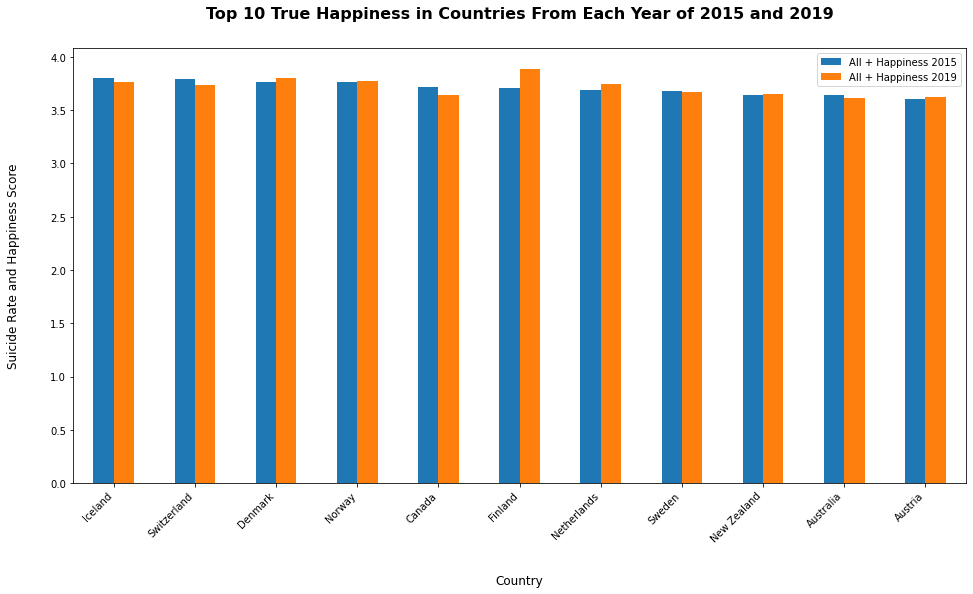

In [88]:
merged_all_happ.plot(x="Country", y=["All + Happiness 2015", "All + Happiness 2019"], kind="bar",figsize=(16,8))
plt.title("Top 10 True Happiness in Countries From Each Year of 2015 and 2019", fontsize='16', pad=30, fontweight='bold')
plt.xlabel("Country", fontsize='12', labelpad=30)
plt.ylabel("Suicide Rate and Happiness Score", fontsize='12', labelpad=30)
plt.xticks(rotation=45, ha='right')

## <mark>Visualization 2</mark> Each Year's Pie Chart of Suicide Rate for Each Region

In [89]:
def draw_piecharts(df, year):
    x = df['All Suicide Rate ' + str(year)].tolist()
    labels = df.Region.unique().tolist()
    year = str(year)
    fig, ax = plt.subplots(figsize=(14, 14))
    patches, texts, pcts = ax.pie(
        x, labels=labels, autopct='%.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'})
    # Style just the percent values.
    plt.setp(pcts, color='white', fontweight='bold')
    ax.set_title('The Number of Each Region in ' + year, fontsize=18)
    plt.tight_layout()

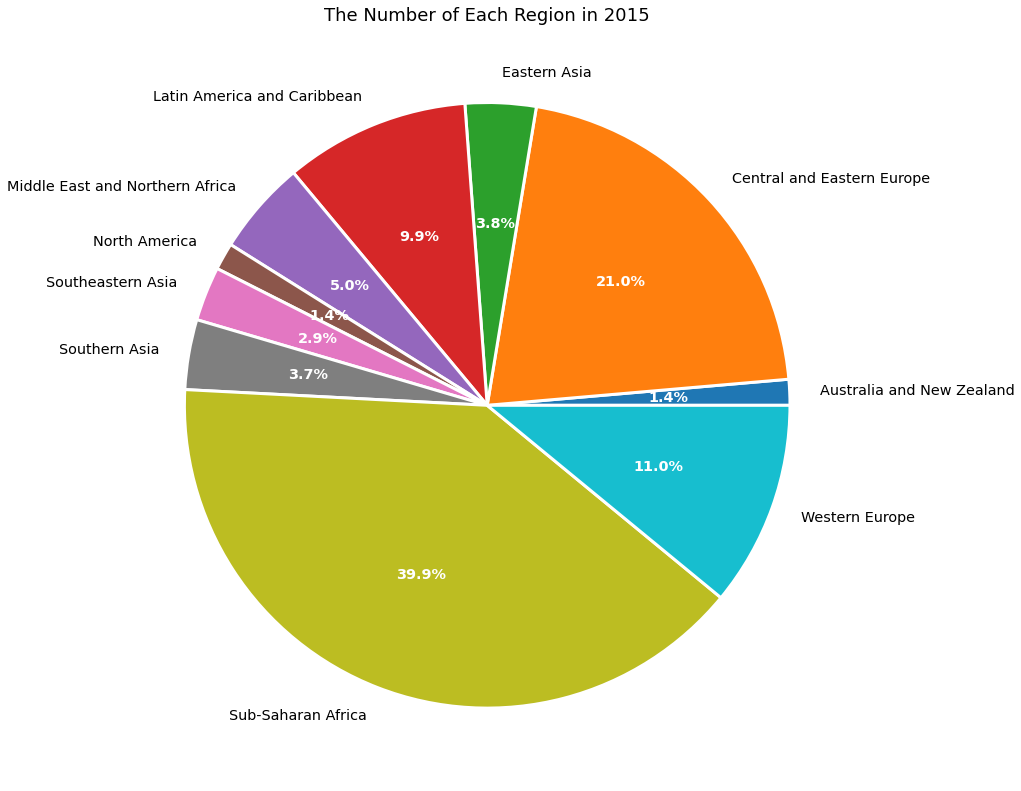

In [90]:
draw_piecharts(merged4, 2015)

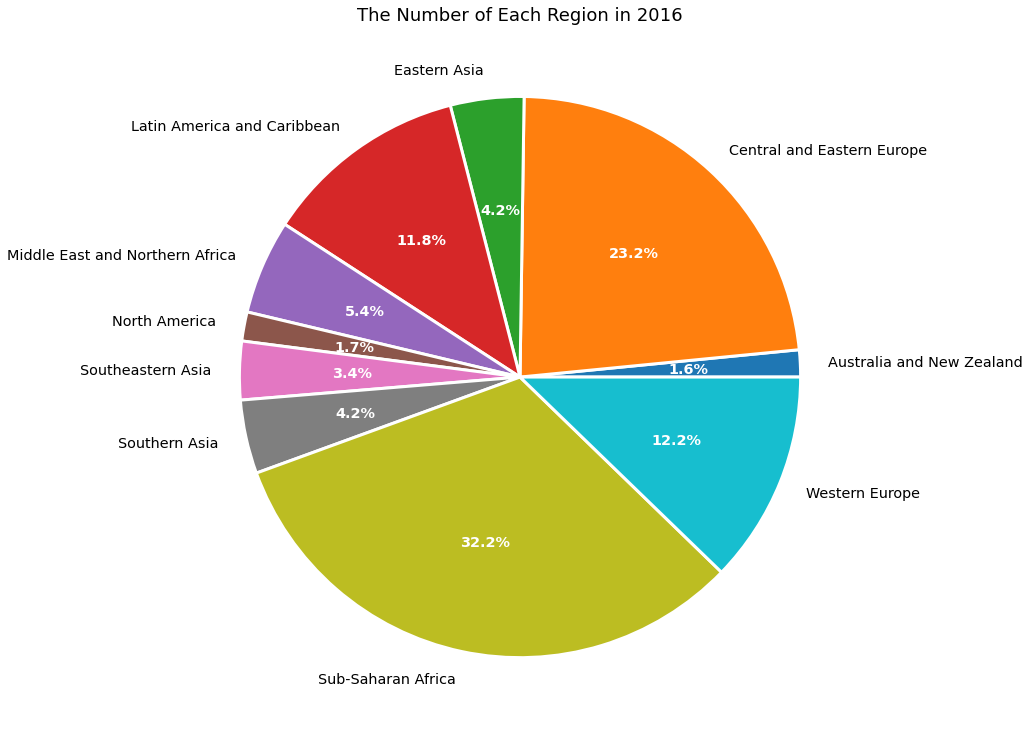

In [91]:
draw_piecharts(merged4, 2016)

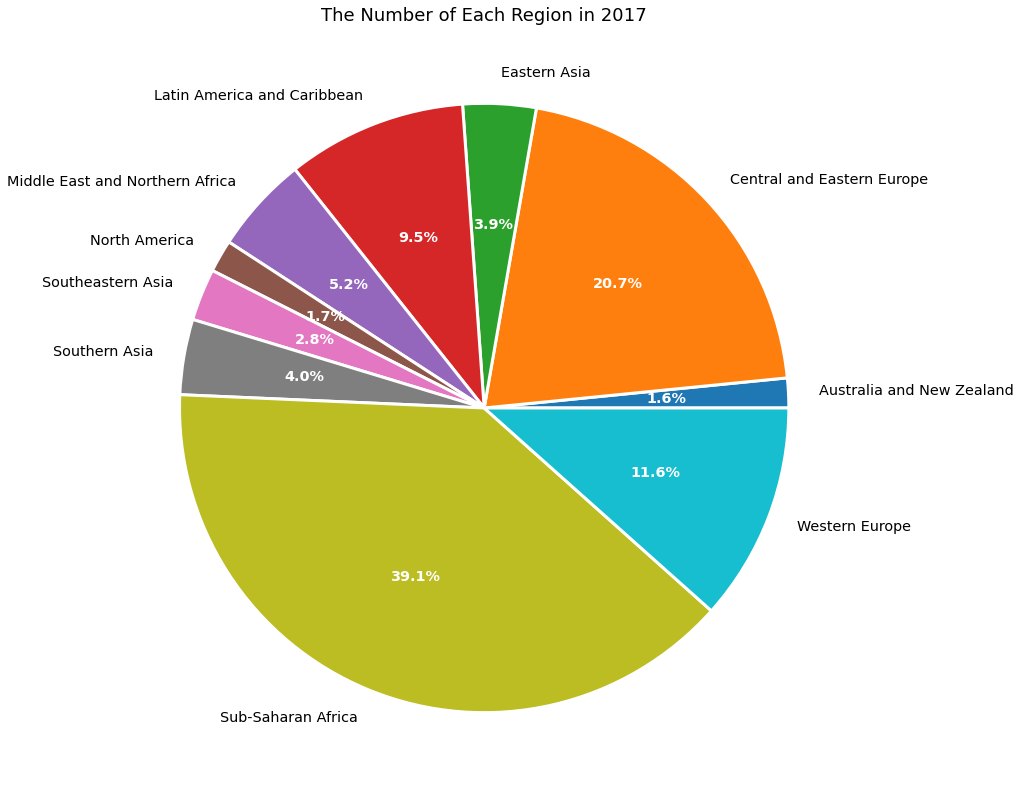

In [92]:
draw_piecharts(merged4, 2017)

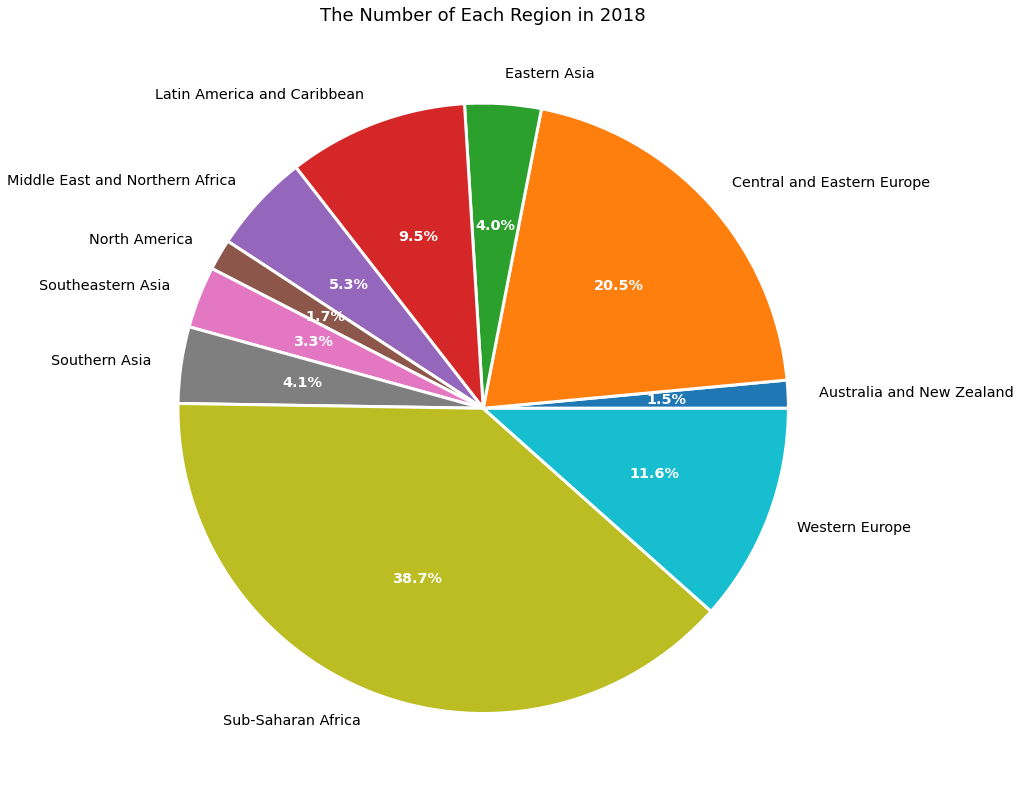

In [93]:
draw_piecharts(merged4, 2018)

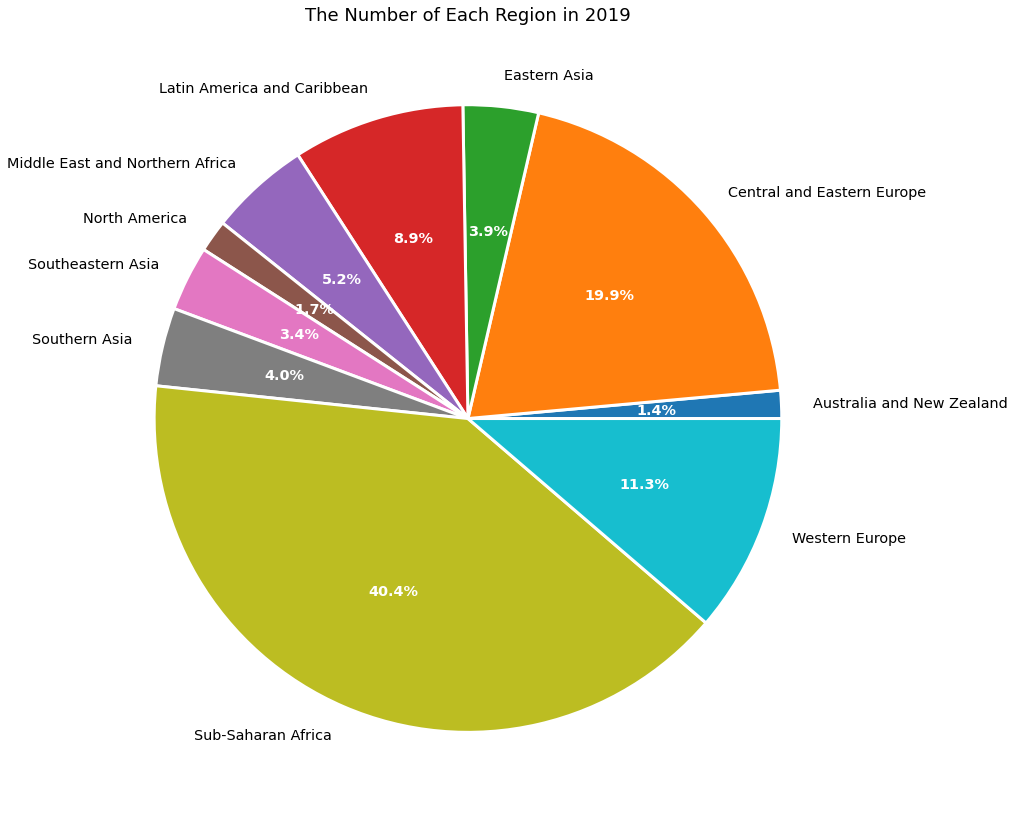

In [94]:
draw_piecharts(merged4, 2019)

### <mark>Visualization 3</mark> Compare USA's Average Happiness Rank with Each Region's Average Happiness Rank For Each Year

In [95]:
def usa_dfyear(worldhappy_df, year):
    year = str(year)
    usa_df = worldhappy_df[worldhappy_df['Country'] == 'United States']
    usa_rank_df = usa_df[["Country", 'Happiness Rank ' + year]]
    usa_rank_df.rename(columns={'Happiness Rank ' + year:'Happiness Rank'}, inplace = True)
    return usa_rank_df

In [96]:
usa_rank2015 = usa_dfyear(worldhappy_2015, 2015)
usa_rank2016 = usa_dfyear(worldhappy_2016, 2016)
usa_rank2017 = usa_dfyear(worldhappy_2017, 2017)
usa_rank2018 = usa_dfyear(worldhappy_2018, 2018)
usa_rank2019 = usa_dfyear(worldhappy_2019, 2019)

/Users/emilycao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [97]:
frames = [usa_rank2015, usa_rank2016, usa_rank2017, usa_rank2018, usa_rank2019]
usa_rank_merge = pd.concat(frames)

years = [2015, 2016, 2017, 2018, 2019]
usa_rank_merge['Year'] = years

# https://stackoverflow.com/questions/48958035/pandas-convert-some-rows-to-columns-in-python
# usa_rank_merge = usa_rank_merge.pivot(index='Year', columns='Country', values='Happiness Rank')
usa_rank_merge = usa_rank_merge.rename(columns={'Country':'Country/Region'})
usa_rank_merge_reset = usa_rank_merge.pivot_table('Happiness Rank', ['Country/Region'], 'Year')
usa_rank_merge_reset
usa_rank_merge

,Country/Region,Happiness Rank,Year
14,United States,15,2015
12,United States,13,2016
13,United States,14,2017
17,United States,18,2018
18,United States,19,2019


In [98]:
def rearrange_happiness_rank_country(df1, row_num):
    new_region_stuff = df1.iloc[[row_num-1]]
    motlen = pd.melt(new_region_stuff)
    motlen = motlen.iloc[1: , :]
    countries = df1['Region']
    the_country = countries.iloc[row_num-1]
    motlen.insert(0, 'Country/Region', the_country)
    motlen['variable'] = pd.to_numeric(motlen['variable'])
    motlen['value'] = pd.to_numeric(motlen['value'])
    motlen.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
    return motlen

In [99]:
len(happiness_over_regions)

10

In [100]:
rearrange1 = rearrange_happiness_rank_country(happiness_over_regions, 1)
# rearrange1.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange2 = rearrange_happiness_rank_country(happiness_over_regions, 2)
rearrange2.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange3 = rearrange_happiness_rank_country(happiness_over_regions, 3)
rearrange3.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange4 = rearrange_happiness_rank_country(happiness_over_regions, 4)
rearrange4.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange5 = rearrange_happiness_rank_country(happiness_over_regions, 5)
rearrange5.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange6 = rearrange_happiness_rank_country(happiness_over_regions, 6)
rearrange6.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange7 = rearrange_happiness_rank_country(happiness_over_regions, 7)
rearrange7.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange8 = rearrange_happiness_rank_country(happiness_over_regions, 8)
rearrange8.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange9 = rearrange_happiness_rank_country(happiness_over_regions, 9)
rearrange9.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)
rearrange10 = rearrange_happiness_rank_country(happiness_over_regions, 10)
rearrange10.rename(columns={'variable':'Year', 'value':'Happiness Rank'}, inplace = True)

In [101]:
happiness_over_regions

,Region,2015,2016,2017,2018,2019
0,Australia and New Zealand,9.500000,8.500000,9.000000,9.000000,9.500000
1,Central and Eastern Europe,79.000000,78.448276,75.068966,74.965517,70.965517
2,Eastern Asia,64.500000,67.166667,64.833333,65.500000,64.833333
3,Latin America and Caribbean,46.909091,48.333333,50.772727,50.545455,51.380952
4,Middle East and Northern Africa,77.600000,78.105263,76.421053,80.894737,84.894737
5,North America,10.000000,9.500000,10.500000,12.500000,14.000000
6,Southeastern Asia,81.222222,80.000000,73.750000,81.888889,85.111111
7,Southern Asia,113.142857,111.714286,109.857143,111.714286,115.857143
8,Sub-Saharan Africa,127.900000,129.657895,127.871795,126.923077,124.800000
9,Western Europe,29.523810,29.190476,27.142857,24.666667,23.380952


([<matplotlib.axis.XTick at 0x7fbac4acb190>,
 [Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019')])

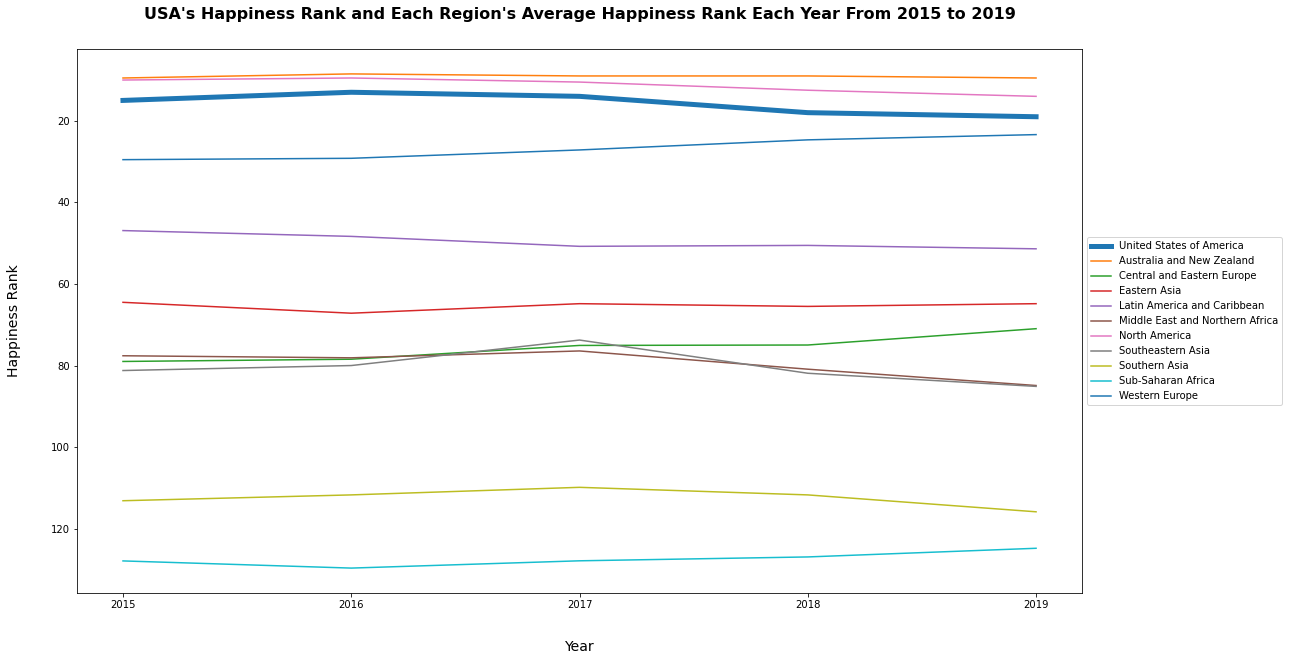

In [102]:
ax = usa_rank_merge.plot(x="Year", y="Happiness Rank", linewidth=5.0, label="United States of America", figsize=(18,10))
rearrange1.plot(ax=ax, x="Year", y="Happiness Rank",label= happiness_over_regions['Region'].iloc[0])
rearrange2.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[1])
rearrange3.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[2])
rearrange4.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[3])
rearrange5.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[4])
rearrange6.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[5])
rearrange7.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[6])
rearrange8.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[7])
rearrange9.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[8])
rearrange10.plot(ax=ax, x="Year", y="Happiness Rank", label = happiness_over_regions['Region'].iloc[9])
plt.title("USA's Happiness Rank and Each Region's Average Happiness Rank Each Year From 2015 to 2019", fontsize='16', pad=30, fontweight='bold')
plt.xlabel("Year", fontsize='14', labelpad=30)
plt.ylabel("Happiness Rank", fontsize='14', labelpad=30)

# https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
plt.gca().invert_yaxis()

#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot-in-matplotlib
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# https://stackoverflow.com/questions/43673884/change-x-axis-ticks-to-custom-strings
x = [2015.0, 2016.0, 2017.0, 2018.0, 2019.0]
plt.xticks(x,[2015,2016,2017,2018,2019])

## <mark>Visualization 4</mark> Lowest Happiness Ranked and Highest Ranked Countries Compare to Its Region's Average Happiness Rank Each Year From 2015 to 2019, Lowest and Highest Ranked Compared to Each Other

In [103]:
low_rank_region_country_all

,Togo 2015,Burundi 2016,Central African Republic 2017,Burundi 2018,Sub-Saharan Africa,South Sudan 2019
Happiness Rank OR Average Rank 2015,158.0,157.0,148.0,157.0,127.900000,NaN
Happiness Rank OR Average Rank 2016,155.0,157.0,NaN,157.0,129.657895,143.0
Happiness Rank OR Average Rank 2017,150.0,154.0,155.0,154.0,127.871795,147.0
Happiness Rank OR Average Rank 2018,139.0,156.0,155.0,156.0,126.923077,154.0
Happiness Rank OR Average Rank 2019,139.0,145.0,155.0,145.0,124.800000,156.0


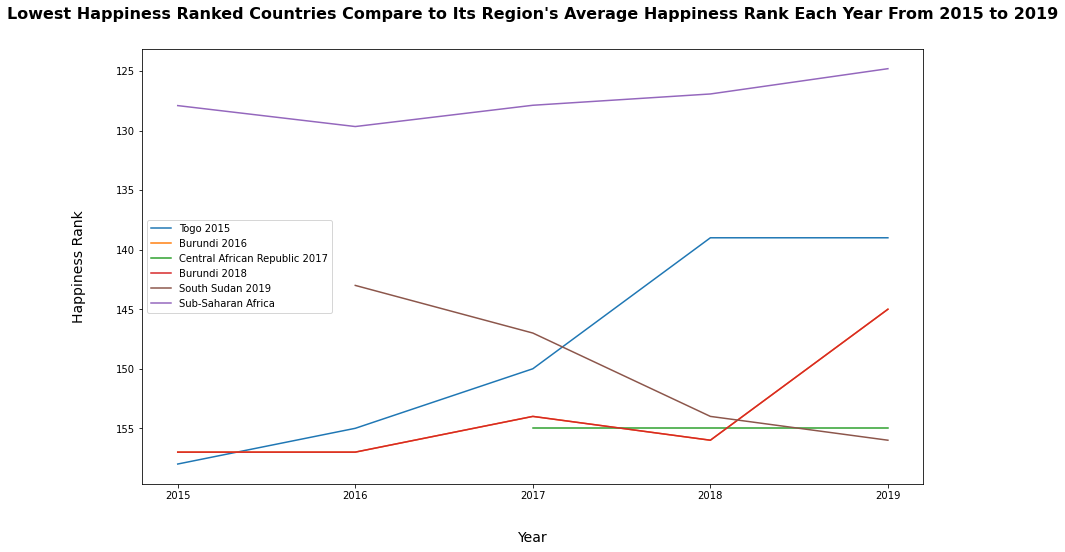

In [104]:
low_rank_region_country_all.plot(figsize=(14, 8))
plt.title("Lowest Happiness Ranked Countries Compare to Its Region's Average Happiness Rank Each Year From 2015 to 2019", fontsize='16', pad=30, fontweight='bold')
plt.xlabel("Year", fontsize='14', labelpad=30)
plt.ylabel("Happiness Rank", fontsize='14', labelpad=30)

# https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
# https://stackoverflow.com/questions/24228856/changing-x-axis-ticks-to-desired-value
plt.gca().invert_yaxis()
x = [0,1,2,3,4]
plt.xticks(x,[2015,2016,2017,2018,2019])

# https://www.statology.org/matplotlib-legend-order/
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,5,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

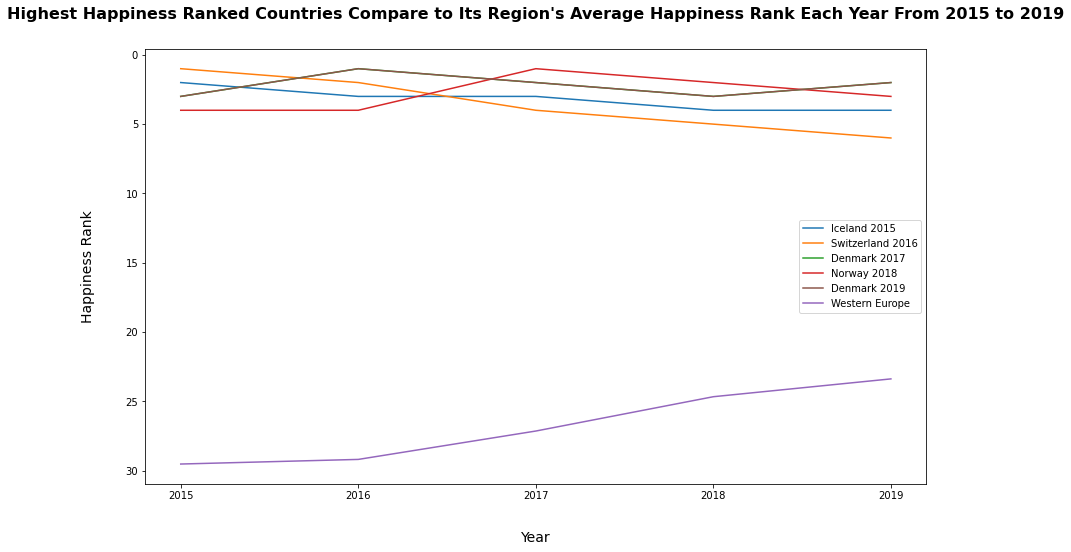

In [105]:
high_rank_region_country_all.plot(figsize=(14, 8))
plt.title("Highest Happiness Ranked Countries Compare to Its Region's Average Happiness Rank Each Year From 2015 to 2019", fontsize='16', pad=30, fontweight='bold')
plt.xlabel("Year", fontsize='14', labelpad=30)
plt.ylabel("Happiness Rank", fontsize='14', labelpad=30)

# https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
# https://stackoverflow.com/questions/24228856/changing-x-axis-ticks-to-desired-value
plt.gca().invert_yaxis()
x = [0,1,2,3,4]
plt.xticks(x,[2015,2016,2017,2018,2019])

# https://www.statology.org/matplotlib-legend-order/
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,5,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

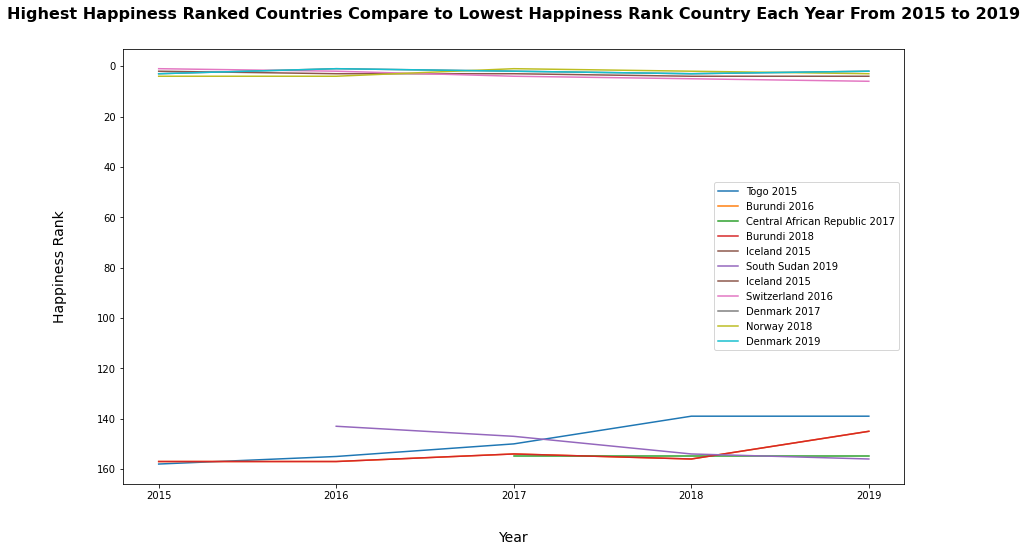

In [106]:
all_the_ranks.plot(figsize=(14, 8))
plt.title("Highest Happiness Ranked Countries Compare to Lowest Happiness Rank Country Each Year From 2015 to 2019", fontsize='16', pad=30, fontweight='bold')
plt.xlabel("Year", fontsize='14', labelpad=30)
plt.ylabel("Happiness Rank", fontsize='14', labelpad=30)

# https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
# https://stackoverflow.com/questions/24228856/changing-x-axis-ticks-to-desired-value
plt.gca().invert_yaxis()
x = [0,1,2,3,4]
plt.xticks(x,[2015,2016,2017,2018,2019])

# https://www.statology.org/matplotlib-legend-order/
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,5,4,5,6,7,8,9]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

## <mark>Visualization 5</mark> 

In [107]:
# Put th widget here, so it doesn't affect the other graphs view
# Only want interactivity for this graph
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px

In [108]:
# conda install -c plotly plotly

/var/folders/n0/sy0g0pdx5n750j7f410gk5wr0000gn/T/ipykernel_1480/1090783054.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'Happiness Score 2019')

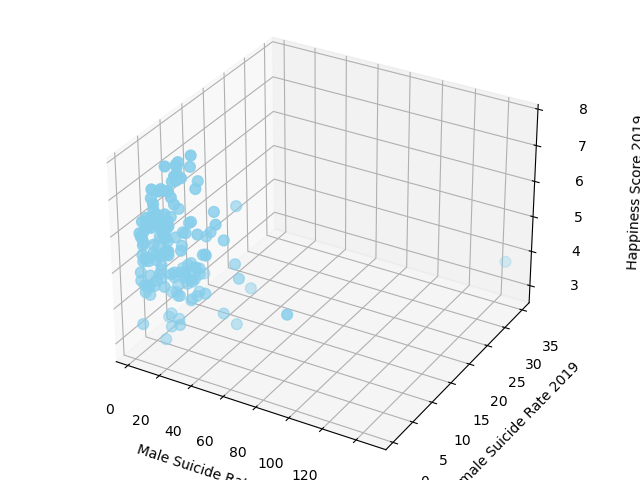

In [109]:
# https://www.geeksforgeeks.org/make-3d-interactive-matplotlib-plot-in-jupyter-notebook/
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection = "3d")
ax.scatter(male_female_rank2019['Male Suicide Rate 2019'], male_female_rank2019['Female Suicide Rate 2019'], male_female_rank2019['Happiness Score 2019'], marker = "o", c='skyblue', s=60)
plt.title("Happiness Score Compared to Male Suicide Rate and Female Suicide Rate in 2019", fontsize='16', pad=30, fontweight='bold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', which='major', pad=12)
ax.set_xlabel('Male Suicide Rate 2019', labelpad=15)
ax.set_ylabel('Female Suicide Rate 2019', labelpad=15)
ax.set_zlabel('Happiness Score 2019', labelpad=25)
#ax.view_init(elevation angle in degrees, lateral angle in degrees)

Above is an interactive graph, it does not show in HTML. Below is how it looks.

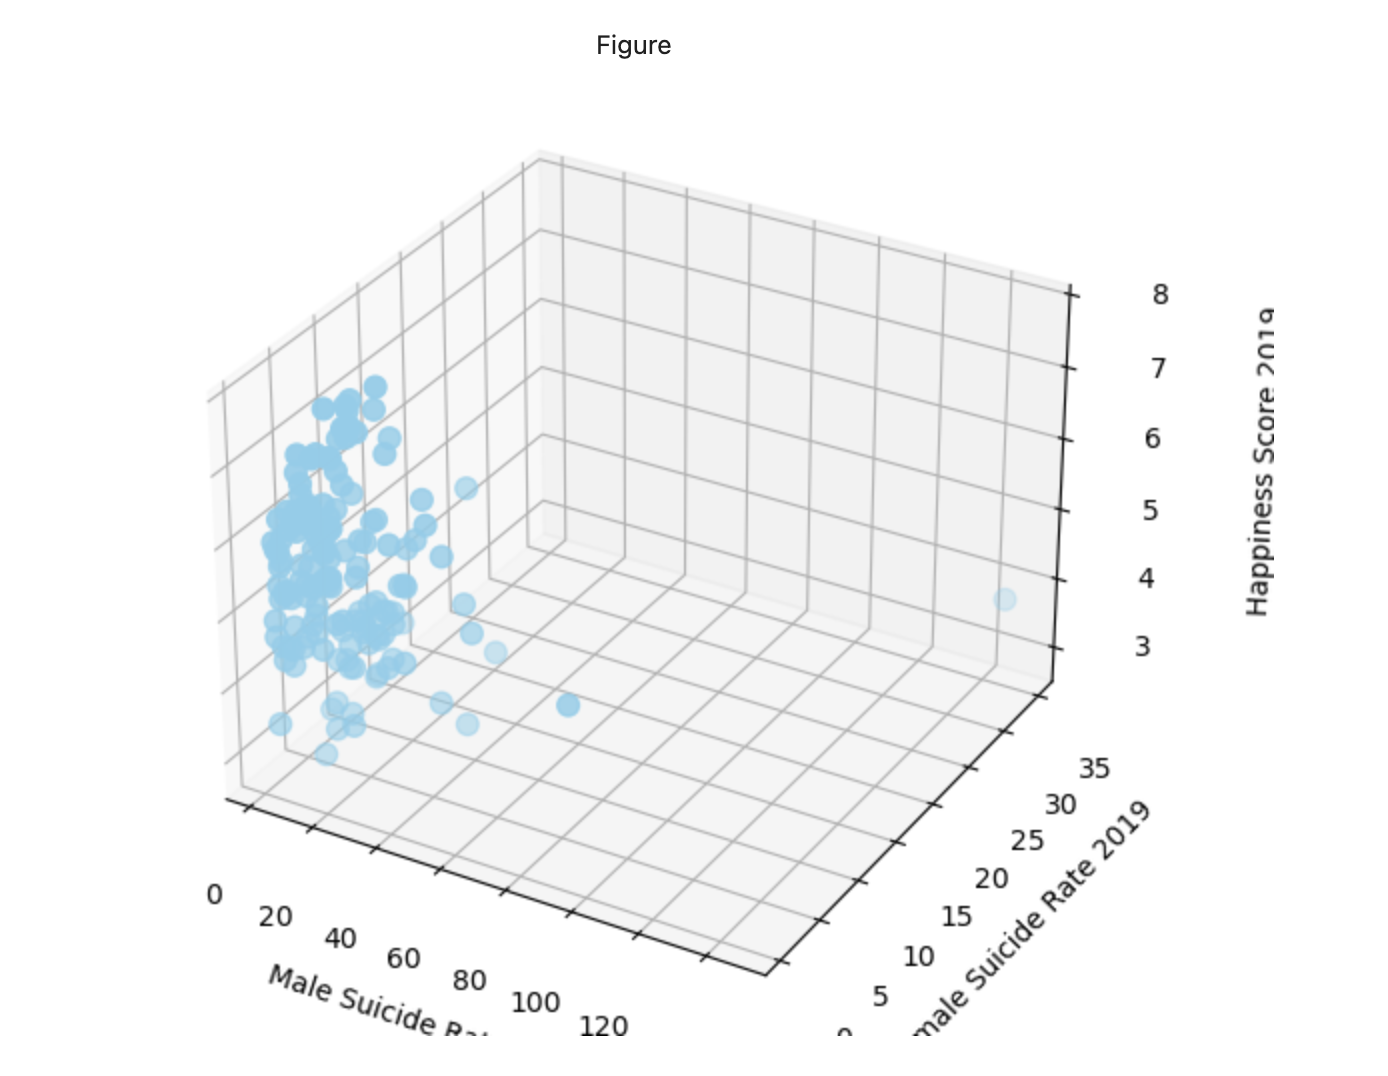

In [111]:
sec_outlier = male_female_rank2019[male_female_rank2019['Male Suicide Rate 2019'] >=70]
sec_outlier

,Country,Male Suicide Rate 2019,Female Suicide Rate 2019,Happiness Score 2019
134,Eswatini,78.7,6.4,4.212
143,Lesotho,146.9,34.6,3.802
